# IDS Assignment Part 1 - <font color="red"><h7>Deadline: 18/12/2022 23:59</h7></font>
This is the first part of the assignments in IDS 2022/2023.
Please use this Jupyter notebook to work on the questions posed in the assignment. When you are done, upload the notebook in Moodle at the designated activity. This is the _only_ file that is required. A separate report is _not_ needed and will not be considered for grading.

Give your commented Python code and answers in the corresponding provided cells. Make sure to answer all questions in a clear and explicit manner and discuss your outputs. _Please do not change the general structure of this notebook_. You can, however, add additional markdown or code cells if necessary. <b>Please DO NOT CLEAR THE OUTPUT of the notebook you are submitting! </b>

<font color="red"> *Please make sure to include the names and matriculation numbers of all group members in the slot provided below.* </font> If a name or a student id is missing, the student will not receive any points.

Hint 1: While working on the assignment, you will get a better understanding of the dataset. Feel free to generate additional results and visualizations to support your answers. For example, this might be useful regarding data modification, data simplification, or output interpretation. <font color="red">Ensure that all your claims are supported.</font>

Hint 2: <font color="red">Plan your time wisely. </font> A few parts of this assignment may take some time to run. It might be necessary to consider time management when you plan your group work. Also, do not attempt to upload your assignment at the last minute before the deadline. This often does not work, and you will miss the deadline. Late submissions will not be considered.

Hint 3: RWTHmoodle allows multiple submissions, with every new submission overwriting the previous one. <b>Partial submissions are therefore possible and encouraged. </b> This might be helpful in case of technical issues with RWTHMoodle, which may occur close to the deadline.

For those using Jupyter Notebook in your local environments, please install the following library in your environment:
```pip install umap-learn==0.5.3```

In [ ]:
#your imports (only use libraries provided in the environment)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import graphviz
import pm4py
import mlxtend
import sklearn
import nltk
import networkx
import pip

pip.main(['install', 'p_decision_tree', 'pydotplus'])

import pydotplus
import p_decision_tree
import statistics
import umap.umap_ as umap
import matplotlib.cm as cm



from sklearn.linear_model import LinearRegression


%matplotlib inline

from sklearn.cluster import KMeans

from sklearn.compose import make_column_selector as selector
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer

from sklearn.svm import SVR
from sklearn.svm import LinearSVR

import sklearn.metrics as metric
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error, mean_absolute_error


from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor



from p_decision_tree.DecisionTree import DecisionTree

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split



from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, StandardScaler


print("You are good to go!")


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


You are good to go!


# Pricing your AirBnB

You finally made it! Working as a data scientist at an established process mining company in New York, you earned so much money that you can buy a flat for yourself. You decide to buy a 2-room apartment in Manhattan. Congratulations!

Currently, you are still living in your rental apartment and are tied to a long-running rental contract. You can only use the apartment in 5 years from now. Therefore, you want to use the apartment as an AirBnB in the meantime, generating some consistent income.


You have no clue how you should price your AirBnB per night (you are living in New York, so you never needed to book an AirBnB). You decide to leverage your unique skill set and perform a data-driven, informed decision. You collect all the data you can get your hands on by traversing all New York apartments. The retrieved data set **AirBnB_original.csv** is your starting point for investigation.

## Question 1: Exploring the Data Set (18 points)

As with every data set, you first want to know what you are dealing with. You perform some exploratory data analysis and clean the data along the way.

Show a few data points contained in the data set. Include all attributes. **(0.5 point)**

In [ ]:
# Your answer goes here

#Importing the dataset
dataSet = pd.read_csv("AirBnB_original.csv")

print("First 5 and last 5  data points in the data set: \n  \n"  + str(dataSet))


First 5 and last 5  data points in the data set: 
  
            id      host id neighborhood group     neighborhood       lat  \
0      1001254  80014485718           Brooklyn       Kensington  40.64749   
1      1002102  52335172823          Manhattan          Midtown  40.75362   
2      1002403  78829239556          Manhattan           Harlem  40.80902   
3      1002755  85098326012           Brooklyn     Clinton Hill  40.68514   
4      1003689  92037596077          Manhattan      East Harlem  40.79851   
...        ...          ...                ...              ...       ...   
72704  6091333  53266862889          Manhattan          Tribeca  40.71845   
72705  6091885  33188605074          Manhattan     East Village  40.72826   
72706  6092437  12312296767           Brooklyn     Williamsburg  40.70862   
72707  6093542  69050334417           Brooklyn       Park Slope  40.67505   
72708  6094647  68170633372          Manhattan  Upper West Side  40.76807   

           long       

### Basic Cleaning (4 points)

First, you have to remove NaN entries across the data set such that we only keep rows without any NaN value. How many rows did you remove? **(0.5 points)**

In [ ]:

# Your answer goes here

dataSet = pd.read_csv("AirBnB_original.csv")

#Removing the null values from the dataset
no_null_dataDF = dataSet.dropna()

print("Number of rows before clean up:" +str(len(dataSet.index)))
print("Number of rows after clean up:" + str(len(no_null_dataDF.index)))

print("We therefore removed  " + str(len(dataSet.index) - len(no_null_dataDF.index)) + " rows from the data set")


Number of rows before clean up:72709
Number of rows after clean up:71232
We therefore removed  1477 rows from the data set


Since duplicated entries are misleading, we want to remove duplicate flats (identified by their id), such that we only keep them once and create a new dataset. How many duplicates are removed? **(0.5 point)**

In [ ]:
# Your answer goes here


#Removing duplicate row entries
no_duplicates_dataDF = no_null_dataDF.drop_duplicates(subset=["id"])

#Saving the data set which has no duplicates and no null values as .csv file in project folder
no_duplicates_dataDF.to_csv('no_duplicates_dataDF.csv')

print("Number of duplicates removed: " + str(len(no_null_dataDF.index) - len(no_duplicates_dataDF.index)))


Number of duplicates removed: 389


From now on, you work with the dataset **AirBnB_cleaned.csv**.

To get a feeling for nightly prices in New York, you take a look at the price attribute. Calculate the average price, the first and third quantiles, and the standard deviation. **(1 point)**

In [ ]:
# Your answer goes here

#Loading the file "AirBnB_cleaned.csv", which does not contain  null nor duplicate entries
dataSet = pd.read_csv("AirBnB_cleaned.csv") #We create a dataset with the cleaned CSV file.

# We use the 'describe' function provided by the pandas dataset to extract the desired information.
print('The average price is ' + str(dataSet['price'].describe()['mean']))
print('The first quartile is ' + str(dataSet['price'].describe()['25%']))
print('The third quartile is ' + str(dataSet['price'].describe()['75%']))
print('The standart deviation is ' + str(dataSet['price'].describe()['std']))



The average price is 625.4636797380085
The first quartile is 340.0
The third quartile is 913.0
The standart deviation is 331.23624102553555


You want to get a more visual picture of the price range. Use a histogram and boxplot to show the distribution of prices on the entire dataset. **(2 points)**

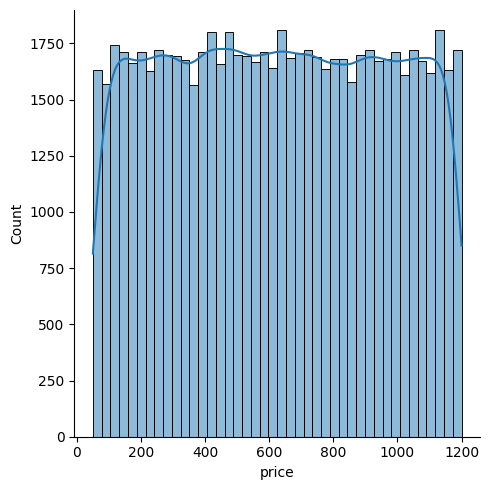

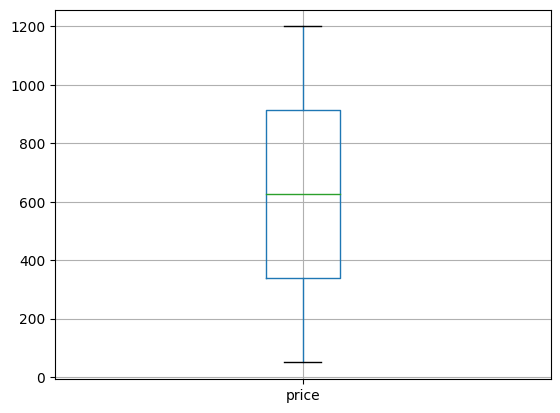

In [ ]:
# Your answer goes here

#ploting the price distribution of the dataSet

sns.displot(data=dataSet, x='price', kde=True);
plt.figure()


#Generating the boxplot for the price distribution of our data
dataSet.boxplot(column='price')
plt.show()
plt.close()

### Exploring Price Relationships (3 points)

To inform our pricing decision, we want to investigate some differentiating factors for pricing apartments.

Since you have an overview of the prices and their distribution, you want to investigate which features of your dataset you might use to make your pricing decision. To do so, discuss each feature of the dataset and already rule out features that will definitely not impact the pricing decision. Below you can find a brief description of each feature:

- id: Unique identifier for an apartment
- host id: Identifier of the host offering a certain apartment
- neighborhood group: Name of a neighborhood group in which an apartment is located
- neighborhood: More fine-grained view on neighborhoods than neighborhood group
- lat: Latitude coordinate of an apartment
- long: Longitude coordinate of an apartment
- country: The country in which an apartment is located
- country code: Code of the country in which an apartment is located
- instant bookable: Boolean values if an apartment is instantly bookable
- cancellation policy: Policy for cancellation of booking
- room type: Type of apartment/room
- construction year: Year of construction of apartment
- price: Price for renting an apartment
- service fee: Fee of service
- minimum nights: Number of minimum nights to rent an apartment
- number of reviews: Number of reviews for an apartment
- review rate number:  Review rate for an apartment (1 to 5)
- calculated host listings count: Number of listings a host has
- number rooms: Number of rooms in an apartment


In [ ]:
# Your answer goes here

#Making sure that we do not discard usefull features
print("Number of unique values from column country code:" + str(dataSet["country code"].unique()))
print("Number of Unique values from column country:" + str(dataSet["country"].unique()))
print("Unique values from a column cancellation policy :" + str(dataSet["cancellation policy"].unique()))




Number of unique values from column country code:['US']
Number of Unique values from column country:['United States']
Unique values from a column cancellation policy :['moderate' 'flexible' 'strict']


_Answer:_

Following features do obviously not influence the price since they are arbitrary strings identifying the host and the listing:
- id: Unique identifier for an apartment
- host id: Identifier of the host offering a certain apartment

Following features do not influence the price since the information they contain is already present in in the features "neighborhood" and "neighborhood group":
- lat: Latitude coordinate of an apartment
- long: Longitude coordinate of an apartment

Since all rows have the same  value for the features  "county-code" & "country", namely United States & US (see above) these features do not add any useful information:
- country code: Code of the country in which an apartment is located
- country: The country in which an apartment is located

We also exclude the price attribute itself for our analysis since it is our target attribute
- price: Price for renting an apartment

We also identify the following features as not/not significantly relevant for the pricing decision
- cancellation policy: Policy for cancellation of booking ==> Not likely  to have no impact on the price
- minimum nights: Number of minimum nights to rent an apartment ==> Unlikely to have an impact on price
- number of reviews: Number of reviews for an apartment ==Likely no strong correlation. More reviews might give bookers more confidence and lead to slightly higher price
- review rate number:  Review rate for an apartment (1 to 5) ==> Higher reviewed rooms likely more pricey, but probably many outliers.
- calculated host listings count: Number of listings a host has ==> Unlikely to have an impact.
- instant bookable: Boolean values if an apartment is instantly bookable ==> Might have an inpact on price, but likely not a strong one
- neighborhood: More fine-grained view on neighborhoods than neighborhood group ==> Same as neighborhood group, but likely weaker correlation due to proximity of listings within the same neighborhood the more relevant distingtion will be found in the feature of "neighborhood group"

As a result we consider the following attributes as relevant for our analysis:
- neighborhood group: Name of a neighborhood group in which an apartment is located ==> Different neighborhoods usually have different rents and thus likeley     different AirBnB prices
- room type: Type of apartment/room ==> It stands to reason, that the room type has an impact on the price
- construction year: Year of construction of apartment ==>  Buildings constructed in  different years are likely more or less desireable, but no linear correlation is to be expacted since often older  buildings are more expansive than some newer buildings due to ther history/design language characteristic to some epoch
- service fee: Fee of service ==> Higher service fee likely means higher price
- number rooms: Number of rooms in an apartment ==>  Higher number of rooms will lead to a higher price





### Univariate Analysis (4.5 points)

In the following, you want to analyze which features influence the price. You do this univariately, i.e., look at the relationship between one feature and the price individually. No matter which features you concluded to be useful in the last task, **you will consider the following seven features: service fee, minimum nights, neighborhood group, room type, cancellation policy, construction year, and the number of rooms.**

First, we look closely at the relationship between price and service fee. To do so, create a joint plot for these two attributes. What is your finding? Is this a helpful feature for our pricing decision? **(1 point)**

<Figure size 640x480 with 0 Axes>

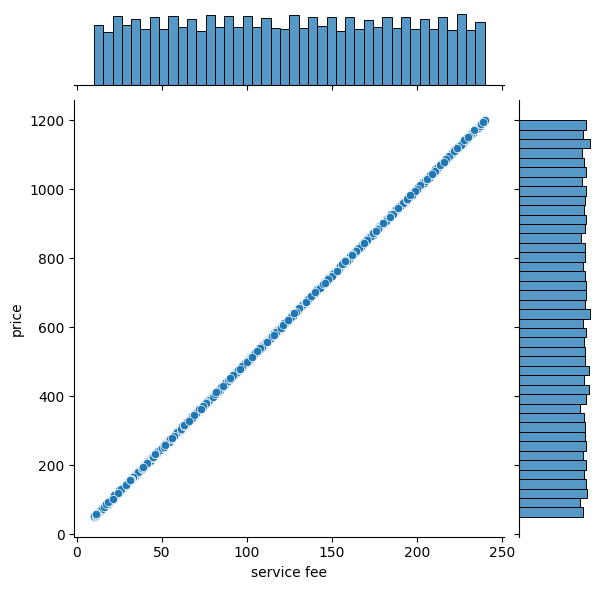

In [ ]:
# Your answer goes here

#In the following we use the jointplot function from seaborn to create a scaterplot with respect to the service fee and its influence on the price

dataSetCleaned = pd.read_csv("AirBnB_cleaned.csv")

plt.figure()

sns.jointplot(x="service fee", y="price", data=dataSetCleaned, kind="scatter");

plt.show()
plt.close()


_Answer:_

We see a unambiguously positive correlation between the price and service fee attribute, the higher the service fee  the higher the price.
Since the service fee is a value set independently of the characteristics of an apartment by the owner it stands to reason that the observed positive correlation is to be understood
as, listings with a high price usually also have a high service fee. Therefore the feature service fee is not helpful for our pricing decision.




Next, we are interested in the relationship between the number of minimum nights and the price. To analyze it, create a joint plot with a regression. Describe your observation. **(1 point)**

<Figure size 640x480 with 0 Axes>

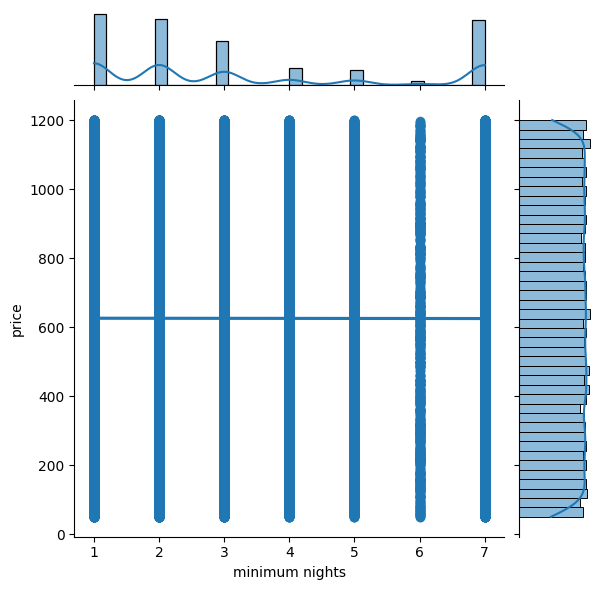

In [ ]:
# Your answer goes here


#We use the jointplot function from seaborn to create regression plot to investigate the influence of "minimum nights" on the price
plt.figure()
sns.jointplot(x="minimum nights", y="price", data=dataSetCleaned, kind="reg");

plt.show()
plt.close()


_Answer:_
According to the joint plot using regression the feature minimum nights does not seem to have an influence in either direction for the price of an apartment.
The plot shows that all prices include the complete range of minimum nights required. Therefore this feature is not helpful for our analysis.



To further investigate the pricing decision, you look at the remaining five features: neighborhood group, room type, cancellation policy, construction year, and the number of rooms.
To get an overview, you decide to create box plots (including the mean) for each of these features to visualize their influence on the price. Describe your findings. Which values of the features influence the price? **(2.5 point)**

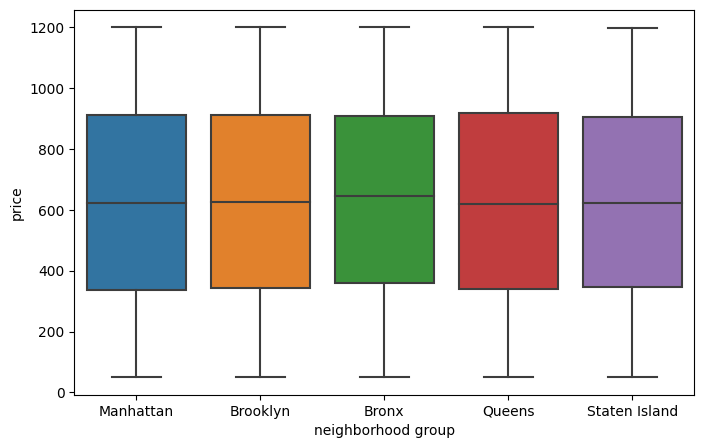

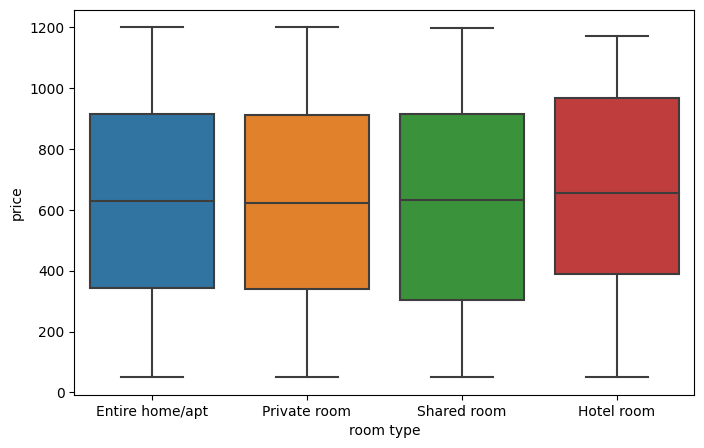

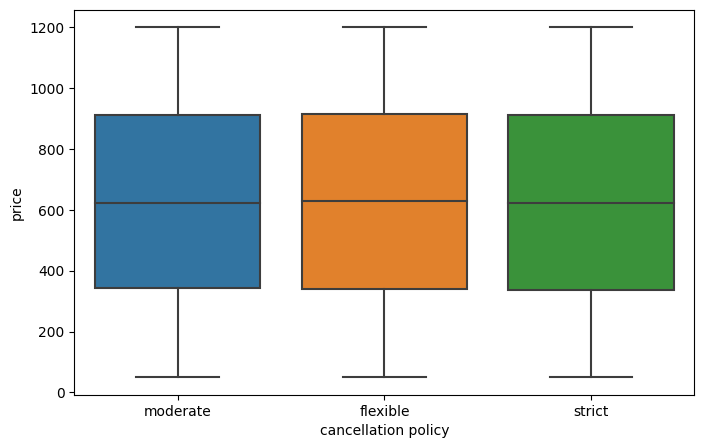

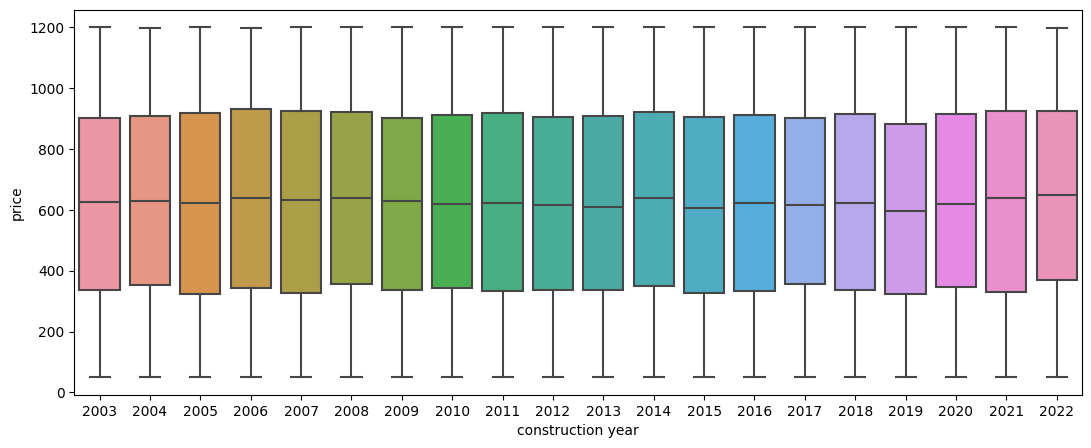

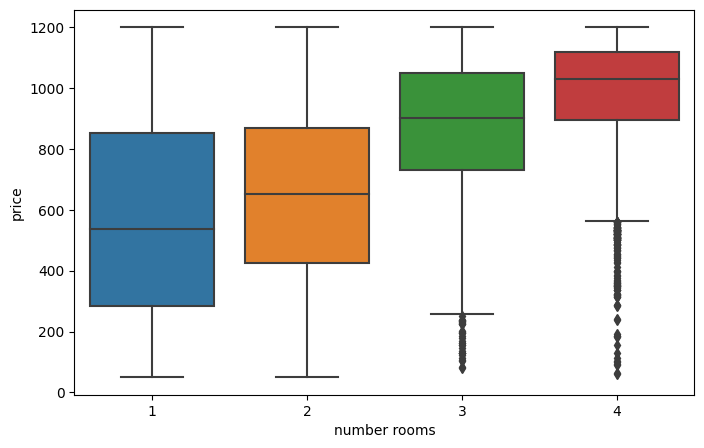

In [ ]:
# Your answer goes here

#We use the boxplot function from seaborn to create boxplots for the different combinations of features.
plt.figure(figsize=(8 ,5 ))
sns.boxplot(x="neighborhood group", y="price", data=dataSetCleaned)

plt.figure(figsize=(8 ,5 ))
sns.boxplot(x="room type", y="price", data=dataSetCleaned)


plt.figure(figsize=(8 ,5 ))
sns.boxplot(x="cancellation policy", y="price", data=dataSetCleaned)

plt.figure(figsize=(13 ,5 ))
sns.boxplot(x="construction year", y="price", data=dataSetCleaned)


plt.figure(figsize=(8 ,5 ))
sns.boxplot(x="number rooms", y="price", data=dataSetCleaned)

plt.show()
plt.close()


_Answer:_

"Cancellation policy" seems to have no impact on pricing.
"Construction year" and "neighborhood group"  shows a slight impact.  
"Room type" shows to have a bigger impact.
While "number of rooms" seems to have the biggest impact on the price.





### Multivariate Analysis (5 points)

As the univariate analysis of price relationships provided only limited insights, you decide to visualize some multivariate investigations of the price. **No matter what you concluded in the last section, you will use the features construction year, number of rooms, cancellation policy, room type, and neighborhood group in the multivariate analysis.**
For each pair of features, create a grouped boxplot (using the hue argument) and investigate whether the two features together allow for an explanation of price differences. In the end, conclude which combination of features should be used to make your pricing decision.

#### Multivariate Analysis for Neighborhood Group

<Figure size 640x480 with 0 Axes>

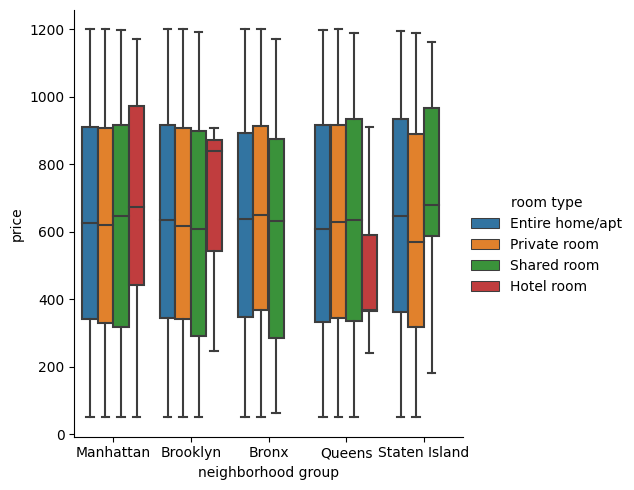

<Figure size 640x480 with 0 Axes>

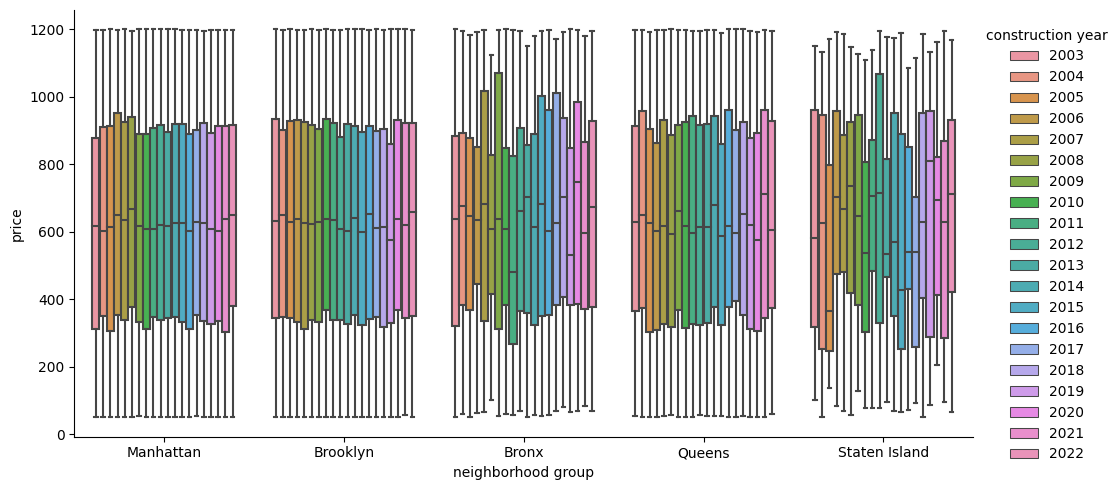

<Figure size 640x480 with 0 Axes>

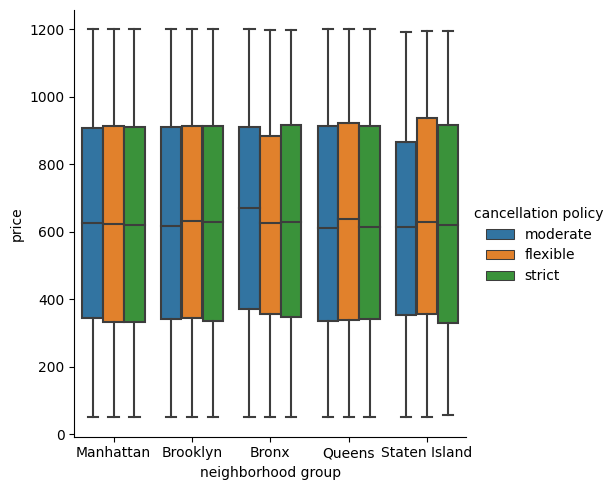

<Figure size 640x480 with 0 Axes>

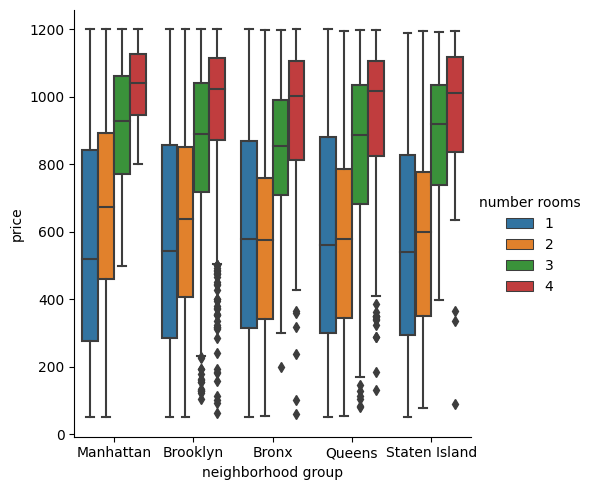

In [ ]:
# Your answer goes here

#We use the catplot function from seaborn to create boxplots with different colors so we can depict 3 different features in one graph.

#First we use the price for the y-axis, the neighborhood group for the x-axis and the colors for 1 of the other 4 features respectively

plt.figure()
sns.catplot(data=dataSetCleaned, x="neighborhood group", y="price", kind="box", hue ="room type")

plt.figure()
sns.catplot(data=dataSetCleaned, x="neighborhood group", y="price", kind="box", hue ="construction year", aspect = 2)

plt.figure()
sns.catplot(data=dataSetCleaned, x="neighborhood group", y="price", kind="box", hue ="cancellation policy")

plt.figure()
sns.catplot(data=dataSetCleaned, x="neighborhood group", y="price", kind="box", hue ="number rooms")


plt.show()
plt.close()


_Answer:_

"number of rooms": Generally speaking the plot shows a positive correlation between the number of rooms and the price of listings in particular when it comes to listings in Manhattan, which is most relevant for our analysis. Outside of Manhattan one and two room listings seem to be priced more or less the same way, while three and four room listings still show a positive correlation with respect to the price.

"room type": Has the second most significant impact on the price. Although not  every "room type" instances is  represented in every "neighborhood group" we see that the price for a hotel room directly depends on its "neighborhood group", e.g. while a just a few hotels in Queens cost more than approx. 880 dollars, in Brooklyn 880 seems to be the average price for a hotel room. At the same time only hotels in Manhattan have a higher price than approx. 900 dollars.

"Construction year": Has the biggest influence on the price in the neighborhood group Staten Island, followed by Bronx and Queens.

"cancellation policy": Shows to have the least influence on the price. All variations cover the whole price range of the data set. The mean value for each "cancellation policy" type in every "neighborhood group" only differs slightly and in Manhattan seem to even be the same.



#### Multivariate Analysis for Room Type

<Figure size 640x480 with 0 Axes>

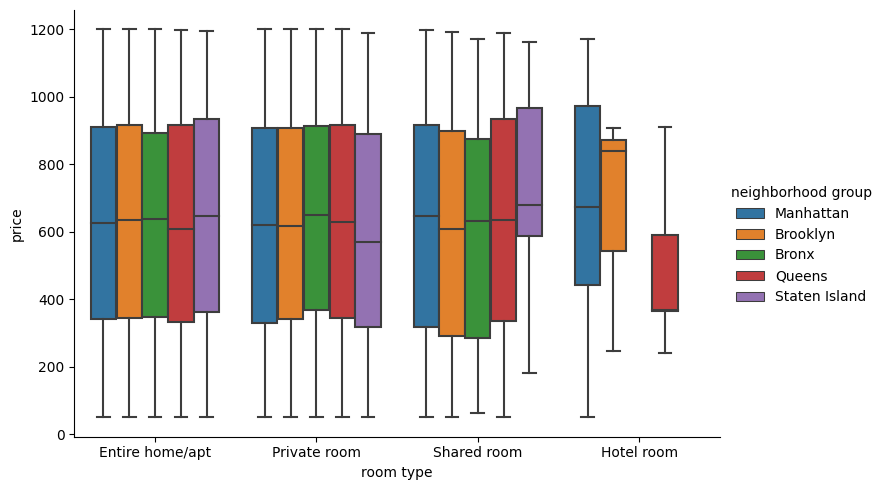

<Figure size 640x480 with 0 Axes>

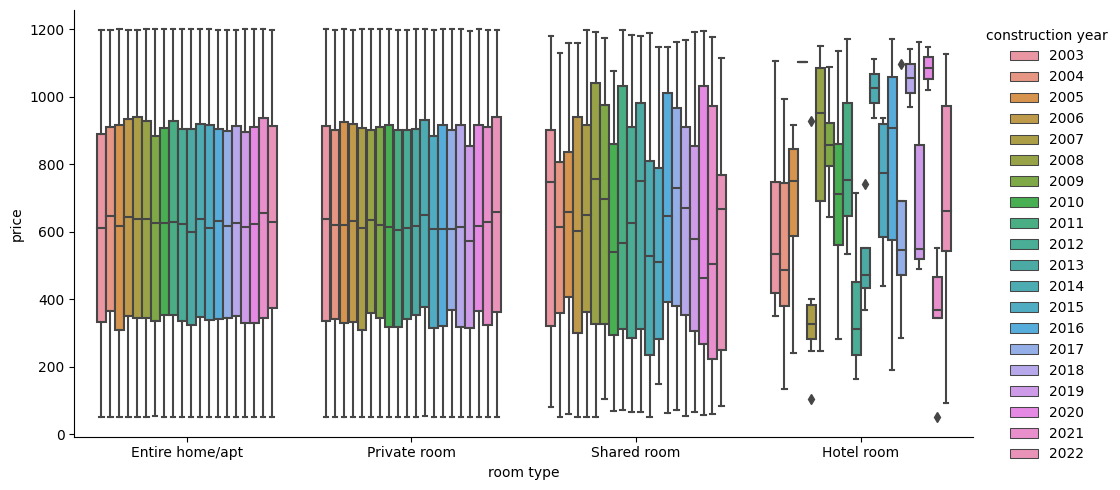

<Figure size 640x480 with 0 Axes>

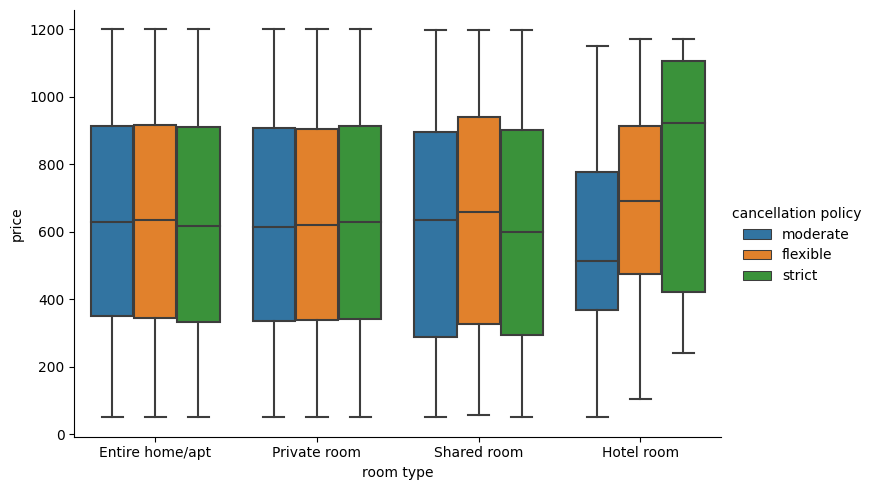

<Figure size 640x480 with 0 Axes>

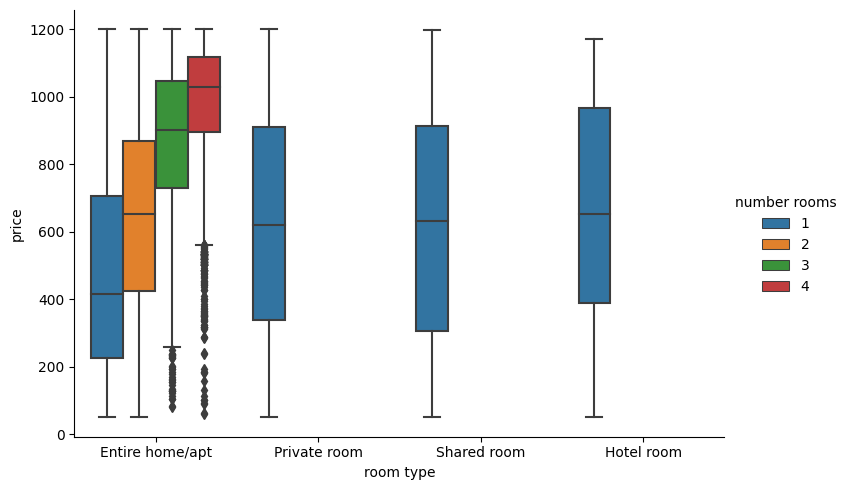

In [ ]:
# Your answer goes here

#Here we use the price for the y-axis, the room type for the x-axis and the colors for 1 of the other 4 features respectively

plt.figure()
sns.catplot(data=dataSetCleaned, x="room type", y="price", kind="box", hue ="neighborhood group", aspect = 1.5)


plt.figure()
sns.catplot(data=dataSetCleaned, x="room type", y="price", kind="box", hue ="construction year", aspect = 2)

plt.figure()
sns.catplot(data=dataSetCleaned, x="room type", y="price", kind="box", hue ="cancellation policy" , aspect = 1.5)

plt.figure()
sns.catplot(data=dataSetCleaned, x="room type", y="price", kind="box", hue ="number rooms", aspect = 1.5)


plt.show()
plt.close()



_Answer:_

“Neighborhood group”: Hotel room has the most feature in this graph. Hotels were only at 3 neighborhood groups, Manhattan, Brooklyn and Queens. Manhattan had the biggest gap between 1st quartile and 3rd quartile. However, the median is the highest in Brooklyn and the gap between 3rd quartile and median is small. Hotels in Queens cost the lowest among three neighborhoods, with its 1st quartile lower than median of Manhattan.
For entire home/apt and private room, all the neighborhood group have similar prices and median. For shared room, all neighborhood groups have similar prices and median too except for Staten Island, which has a bit higher median with big difference between median and 3th quartile.

“Construction year”: For entire home/apt and private room, the graphs look similar. For shared room, the prices get different for each construction years but there is no apparent correlation between two. For hotel room, it looks like shared room except that hotel rooms were not built every year. Also, there are some outliers drawn unlike other room types.

“Cancellation policy”: It’s the least effective feature since the median of prices are almost the same for all entire home/apt and private room. For shared room, it looks similar to entire home/apt or private room but the difference is that when cancellation policy is flexible, the price gets a bit higher than moderate or strict cancellation policy. For hotel room, the price gets prominently higher when cancellation gets stricter.

“Number Rooms”: The price gets prominently higher when number of rooms increases. However, considering that private room, shared room, and hotel room always offer just one room, analyzing the relationship between room type and number rooms is useless in this case.



#### Multivariate Analysis for Number of Rooms

<Figure size 640x480 with 0 Axes>

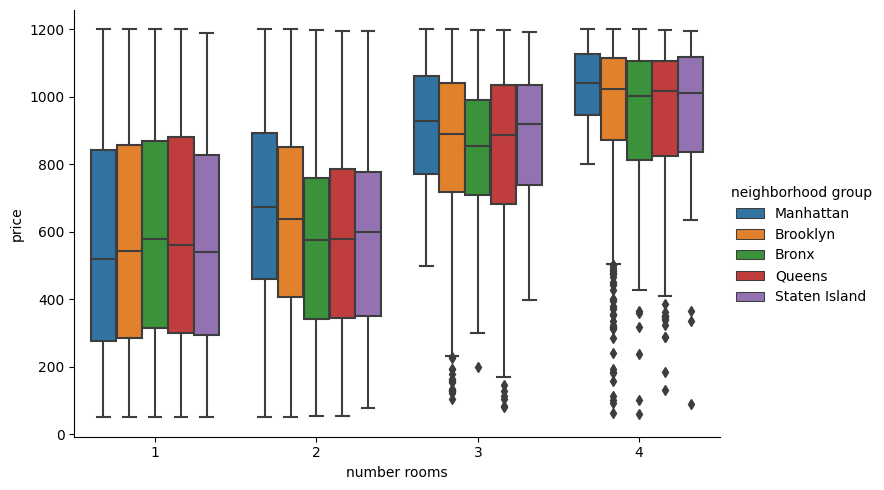

<Figure size 640x480 with 0 Axes>

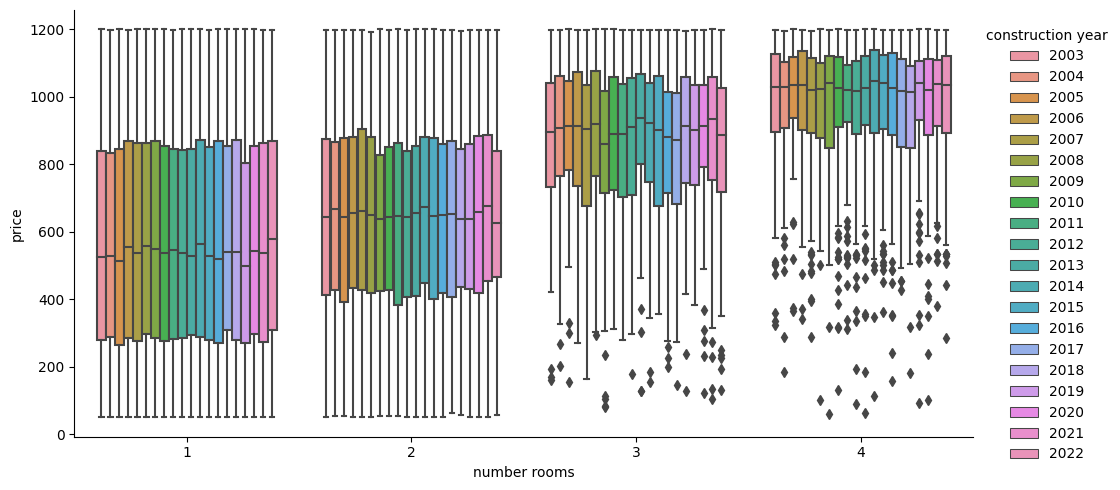

<Figure size 640x480 with 0 Axes>

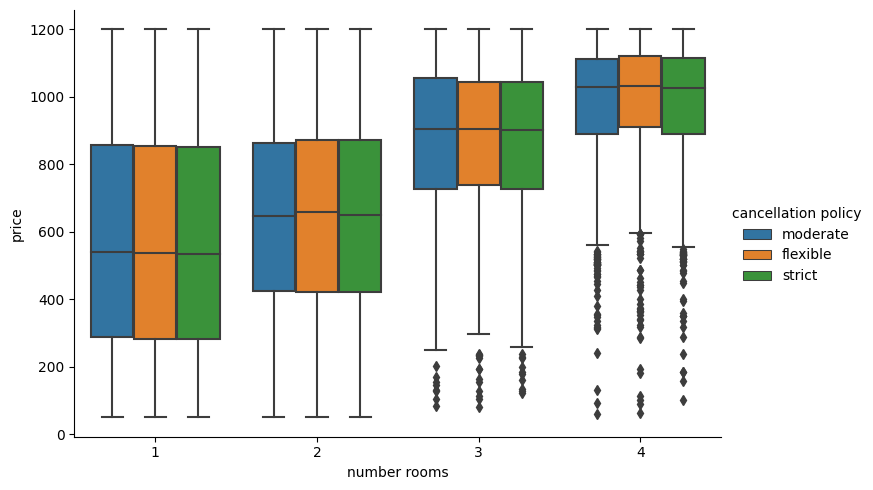

<Figure size 640x480 with 0 Axes>

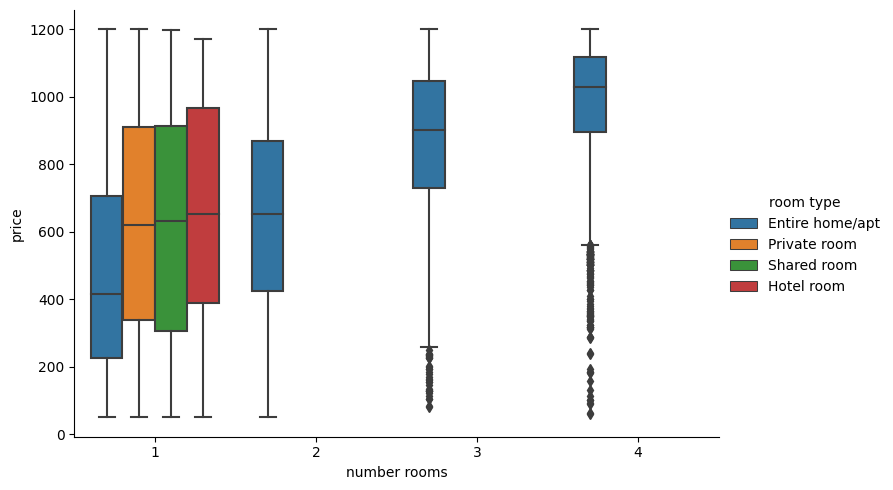

In [ ]:
# Your answer goes here

#Here we use the price for the y-axis, the number of rooms for the x-axis and the colors for 1 of the other 4 features respectively
plt.figure()
sns.catplot(data=dataSetCleaned, x="number rooms", y="price", kind="box", hue ="neighborhood group", aspect = 1.5)


plt.figure()
sns.catplot(data=dataSetCleaned, x="number rooms", y="price", kind="box", hue ="construction year", aspect = 2)

plt.figure()
sns.catplot(data=dataSetCleaned, x="number rooms", y="price", kind="box", hue ="cancellation policy" , aspect = 1.5)

plt.figure()
sns.catplot(data=dataSetCleaned, x="number rooms", y="price", kind="box", hue ="room type", aspect = 1.5)


plt.show()
plt.close()

_Answer:_

“neighborhood group”: Overall, apartments’ prices differ a lot for all the neighborhoods when the number rooms decreases. Apartments in Staten Island gets relatively more expensive than other neighborhoods as the number of rooms increased. Manhattan has the highest price except for the case when the number of rooms is one.

“Construction year”: All graph shown look similar. There was a slight price decline between 2011 and 2017 for number of rooms 3 and 4, but it does not seem to have big influence.

“Cancellation policy”: It’s the least effective feature since the median of prices are almost the same for all cancellation policy, regardless of number of rooms.

“Room Type”: There are various types of rooms which has one room. Considering the fact that private room, shared room, and hotel room always offer just one room, analyzing the relationship between room type and number rooms is useless in this case.






#### Multivariate Analysis for Construction Year

<Figure size 640x480 with 0 Axes>

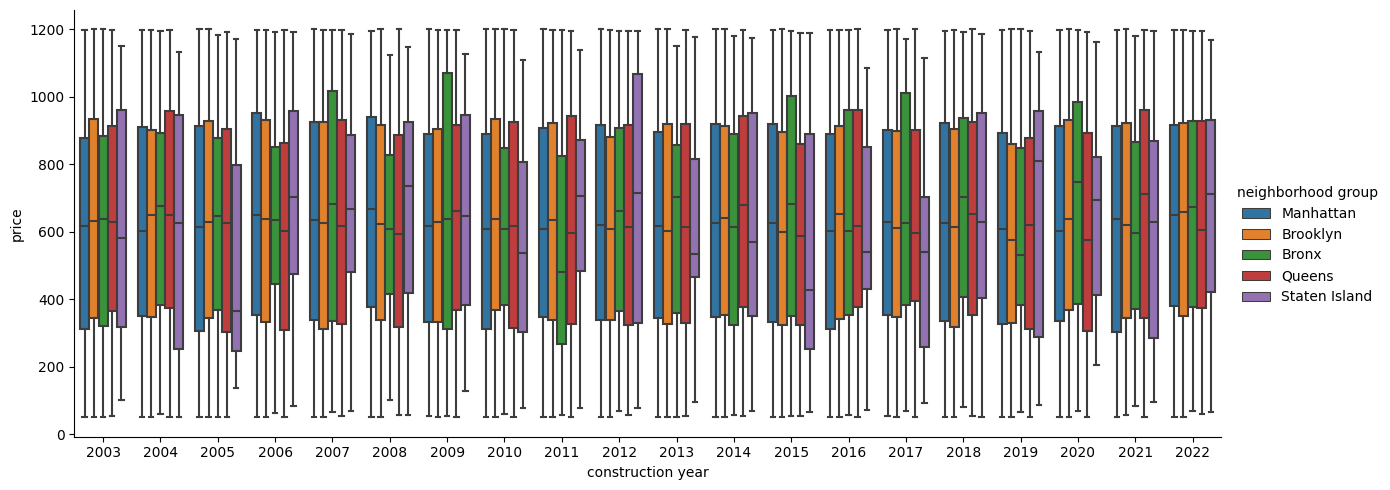

<Figure size 640x480 with 0 Axes>

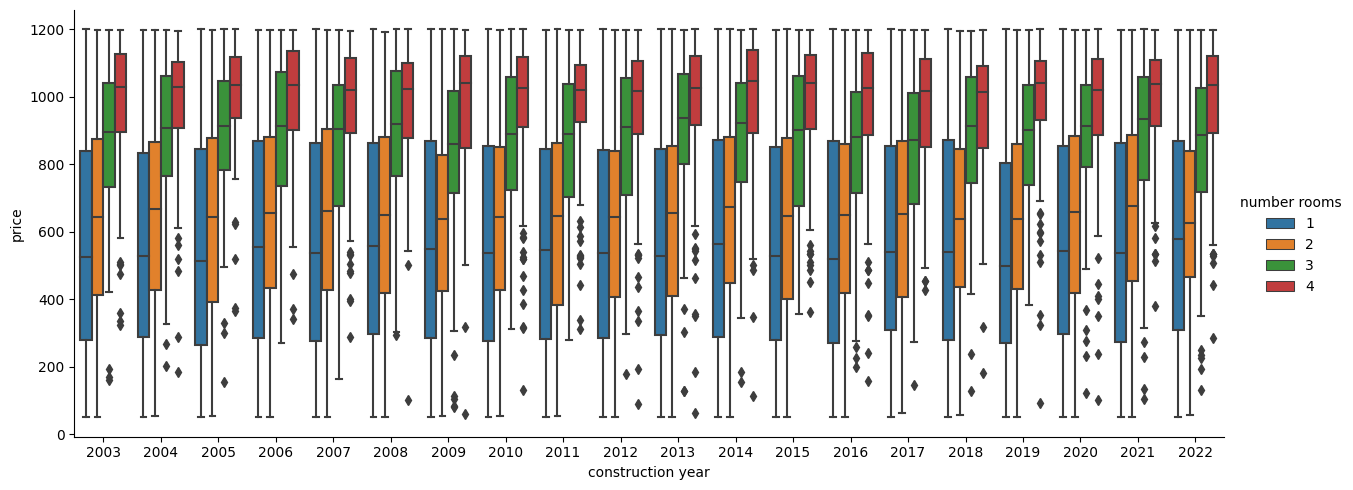

<Figure size 640x480 with 0 Axes>

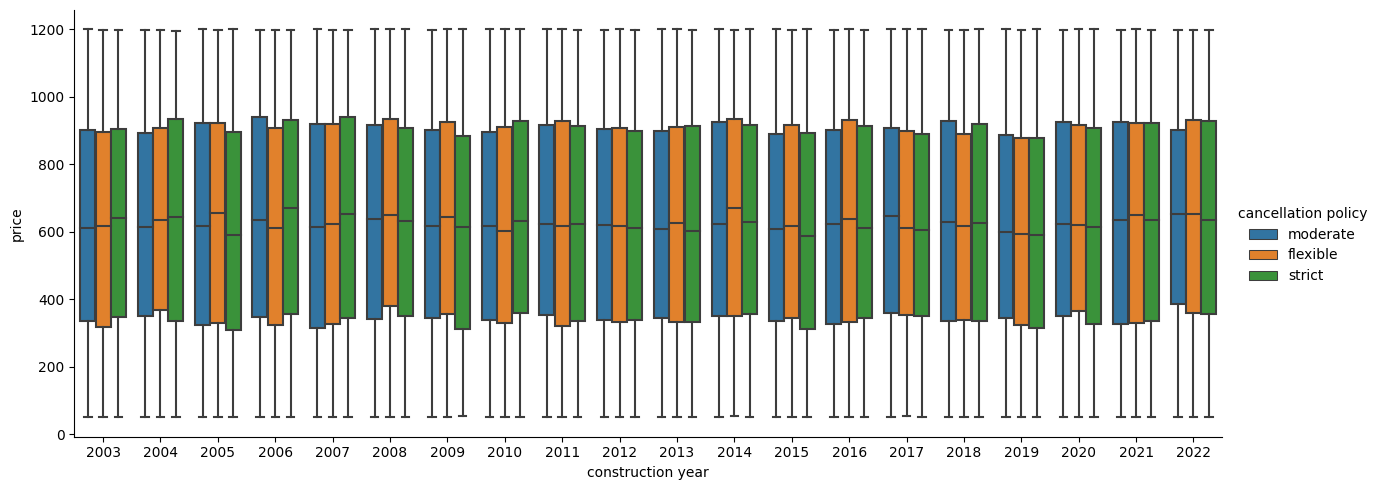

<Figure size 640x480 with 0 Axes>

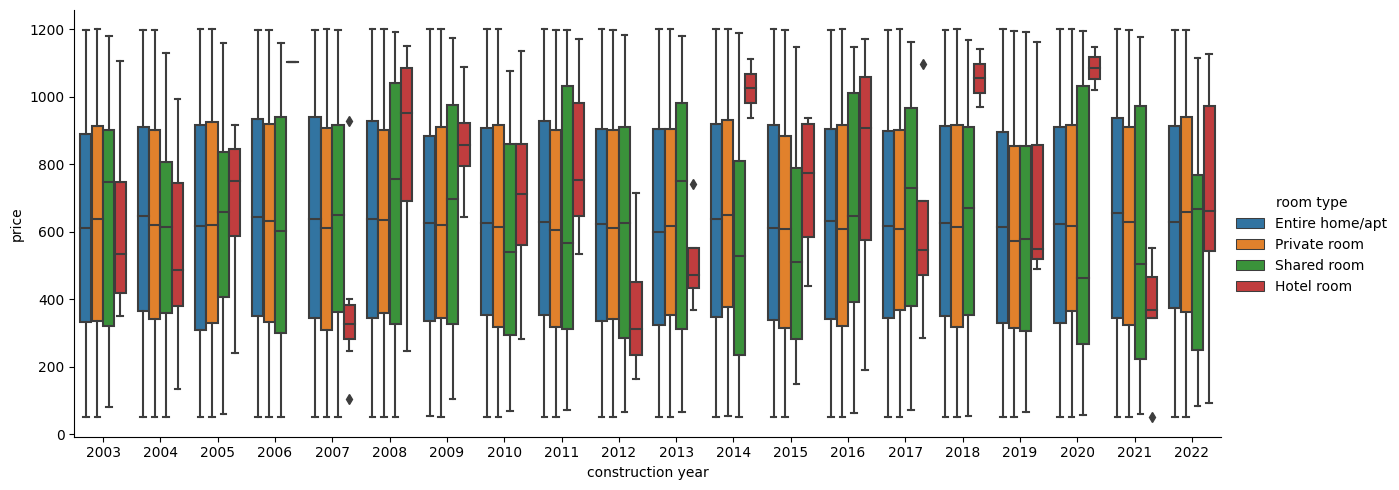

In [ ]:
# Your answer goes here
#Here we use the price for the y-axis, the construction year for the x-axis and the colors for 1 of the other 4 features respectively

plt.figure()
sns.catplot(data=dataSetCleaned, x="construction year", y="price", kind="box", hue ="neighborhood group", aspect = 2.5)


plt.figure()
sns.catplot(data=dataSetCleaned, x="construction year", y="price", kind="box", hue ="number rooms", aspect = 2.5)

plt.figure()
sns.catplot(data=dataSetCleaned, x="construction year", y="price", kind="box", hue ="cancellation policy" , aspect = 2.5)

plt.figure()
sns.catplot(data=dataSetCleaned, x="construction year", y="price", kind="box", hue ="room type", aspect = 2.5)


plt.show()
plt.close()

_Answer:_


“neighborhood group”: There is no consistent feature shown in the graph, but price vary a lot in Bronx in 2009 and in Staten Island in 2012.

“room type”:The price varies the most for  hotel rooms, followed by shared rooms. While entire home/apt and private rooms seeme to have a more stable price over the years.

“cancellation policy”: It’s the least effective feature since the median of prices are almost the same for all cancellation policies, regardless of construction year.

“number rooms”: We see a positve correlation between "number rooms" and the price over the whole time span.





### Selection of Variables (1 point)

Please argue: Which combinations of variables would you consider for pricing your AirBnB?

_Answer:_

Just based on the univariate analysis the 'number of rooms' feature seems to have to biggest impact on pricing, so this is the first feature we should consider. The 'room type' feature also seem to have a measureable impact, especially the distinction between hotel room/no hotel room, which is also supported by the multivariate analysis, so we should also include this feature. Unfortunately there is a casual link between these two features, as we can easily see in the multivariate graph for these: Only entire homes can have more than one room. Therefore it is best to include one more feature. We choose 'neighborhood group' since it has the biggest impact on pricing of the remaining three features and end up the combination 'number of rooms'/'room type'/'neighborhood group'.


## Question 2: Setting the Price (45 points)

No matter what you have deducted from your analysis, from now on, you will continue only with three features: **The number of rooms, the neighborhood group, and the room type.**

**Enter Toby**: Toby is your long-term friend back from studying at RWTH. While you studied computer science, Toby studied business administration to become a big shot at Wall Street. He currently works in the back office of some swiss credit institute just across the corner from your office. You decide to drop by and get some of his input for your pricing decision.

Toby proposes to first use comparables pricing to price your apartment. Comparables pricing is an established concept in economics and means that you price your apartment close to similar apartments.
You will use different techniques to find similar apartments and set a price.

## Baseline (5 points)

First, you want to set a baseline to compare against. You use the mean absolute error as metric. The baseline should always use the average price of all apartments as a recommended price. Evaluate on a test set of 5%. The same test set should also be used later (you can use the random_state argument in scikit learn's train_test_split, but you need to stay consistent for different questions).

In [ ]:
# Your answer goes here





# We first create a new dataSet for Q2 which contains thre requested features
q2DataSet = dataSetCleaned[['number rooms','neighborhood group', 'room type', 'price']].copy()

# We then calculate as our  baseline the avg. price of all apartments as a recommended price
# Computing the mean price on the complete data set as requested in the task statement

totalAveragePrice =  q2DataSet["price"].mean()

#Splitting the dataSet into a testSet of size 5% using a matrkl. number as a seed, which we use consistently through the reamining assignment
testSet = q2DataSet.sample(frac=0.05, random_state=322420)

avgTotalArray = np.arange(testSet.shape[0])
avgTotalArray.fill(totalAveragePrice)

# Calculating the mean absolute error using the sklearn function mae

error = mae(testSet['price'], avgTotalArray)

print("The mean absolute error is : %.2f" % error )


# Generating the requested test and train data sets using the train_test_split method
descriptiveColumns = q2DataSet.drop('price', axis=1)
base_X_train, base_X_test, base_y_train, base_y_test = train_test_split(descriptiveColumns, q2DataSet['price'] ,random_state=322420, test_size=0.05)



The mean absolute error is : 283.03


## Decision Tree (15 points)

Using a decision tree, you try to price your apartment according to similar apartments.

In the following, we want to know the price ranges for renting AirBnBs. To use decision trees, you need to discretize prices. We use the following price bins:


- [50, 200]
- (200, 400]
- (400, 600]
- (600, 800]
- (800, 1000]
- (1000, 1200]

We add the attribute "Price_Bins" using the discretization mentioned above for each apartment. For example, if an apartment costs 404, it is put into the bin (400, 600]. **(2 points)**

In [ ]:
# Your answer goes here



# We add a column "Priced Bins" to  q2DataSet  using the cut function and the array [49,200,400,600,800,1000,1200] for bins since the method does not include the first value of the array
q2DataSet['Price_Bins']=pd.cut(x=q2DataSet['price'], bins=[49,200,400,600,800,1000,1200])

#print(q2DataSet)
binnedQ2DataSet = q2DataSet.copy()
binnedQ2DataSet










,number rooms,neighborhood group,room type,price,Price_Bins
0,2,Manhattan,Entire home/apt,142,"(49, 200]"
1,1,Manhattan,Private room,620,"(600, 800]"
2,2,Brooklyn,Entire home/apt,368,"(200, 400]"
3,1,Manhattan,Entire home/apt,204,"(200, 400]"
4,1,Brooklyn,Private room,71,"(49, 200]"
...,...,...,...,...,...
70837,1,Queens,Private room,103,"(49, 200]"
70838,1,Queens,Private room,982,"(800, 1000]"
70839,1,Queens,Private room,946,"(800, 1000]"
70840,1,Manhattan,Entire home/apt,1043,"(1000, 1200]"


Consider the extended dataset from the previous task. Use 'number rooms,' 'room type,' and 'neighborhood group' as descriptive features and "Price_Bins" as the target feature. Create a test and training set like before. **(0.5 point)**

In [ ]:
# Your answer goes here

# Generating the train & test sets for the DT Algorithm according to the examples form the instruction
dt_data = binnedQ2DataSet.drop(columns = ['price'])
columns = dt_data.columns

#All columns except the last one are descriptive by default
descriptive_features = columns[:-1]


#The last column is considered as label
label = columns[-1]


#Converting all the columns to string
for column in columns:
    binnedQ2DataSet[column]= binnedQ2DataSet[column].astype(str)

data_descriptive = binnedQ2DataSet[descriptive_features].values
data_label = binnedQ2DataSet[label].values


X_train, X_test, y_train, y_test = train_test_split(data_descriptive, data_label, random_state=322420, test_size=0.05)

print(X_train)


[['1' 'Manhattan' 'Private room']
 ['1' 'Brooklyn' 'Private room']
 ['4' 'Manhattan' 'Entire home/apt']
 ...
 ['1' 'Brooklyn' 'Private room']
 ['1' 'Manhattan' 'Entire home/apt']
 ['1' 'Manhattan' 'Private room']]


Generate a decision tree in which the minimum number of samples for splitting is ten and use entropy. What is the system's entropy? **(5 points)**

Note: For this task, you must use the p_decision_tree library.

In [ ]:
# Your answer goes here

#Calling DecisionTree constructor using entropy as our criterion
decisionTree = DecisionTree(X_train.tolist(), descriptive_features.tolist(), y_train.tolist(), "entropy")

# As requested we set set the min. leaf size to 10 and min gain to 0
decisionTree.id3(0,10)

#Visualizing decision tree by Graphviz =============> Although the Error msg. shows up, the output folder including the decision tree will be generated after about 1 min
dot = decisionTree.print_visualTree( render=True )

print("System entropy: ", format(decisionTree.entropy))


System entropy:  2.576740063855132


Error: no "view" mailcap rules found for type "application/pdf"
/usr/bin/xdg-open: 869: www-browser: not found
/usr/bin/xdg-open: 869: links2: not found
/usr/bin/xdg-open: 869: elinks: not found
/usr/bin/xdg-open: 869: links: not found
/usr/bin/xdg-open: 869: lynx: not found
/usr/bin/xdg-open: 869: w3m: not found
xdg-open: no method available for opening 'output/visualTree.gv.pdf'


What is the first feature the decision tree splits on? **(0.5 point)**

_Answer:_

The decision tree first splits on the feature "number rooms".

Since it doesn't make sense to set a price range for renting a room, we need to fix a price. For simplicity, we use the means of the bins, i.e., 125, 300, 500, 700, 900, and 1100. For example, if a room were categorized in the bin (200, 400], it would have the price of 300.

What prices are possible given your decision tree for:

- Manhattan, 1-room, Private room
- Staten Island, 1-room, Shared room

**(1 point)**

_Answer:_


- For Manhattan, 1-room, Private room: The price would be according to our decision tree 500 dollars

- Staten Island, 1-room, Shared room: The price would be according to our decision tree 700 dollars





What is the proposed price of the decision tree for our apartment? Store it in a variable for later usage. **(1 point)**

In [ ]:
# Your answer goes here

# The propsed price for our 2 room apartment in Manhattan should be according to our decision tree 700 dollars

proposedPriceDT = 700




To evaluate how good our decision tree is for determining price categories, we want to measure the error of the predictions on the test set. To do so, the IDS team provided you helper functions below.

In [ ]:
def get_name_value_dict(graph):
    id_label_dict = {}
    root = decisionTree.root
    visited = set() # Set to keep track of visited nodes of graph.

    def dfs(visited, graph, node):#function for dfs
        id_label_dict[node.name] = node.value
        if node not in visited:
            if node.next:
                id_label_dict[node.next.name] = node.next.value
            visited.add(node)
            if node.childs:
                for child in node.childs:
                    if child is not None:
                        dfs(visited, graph, child)
            elif node.next:
                if node.next.childs:
                    for child in node.next.childs:
                        if child is not None:
                            dfs(visited, graph, child)
    dfs(visited, graph, root)
    return id_label_dict

def get_predictor(tree):
  id_label_dict = get_name_value_dict(tree)
  dotplus = pydotplus.graph_from_dot_data(tree.source)
  G = networkx.nx_pydot.from_pydot(dotplus)
  root = [n for n,d in G.in_degree() if d==0][0]
  paths = []
  for node in G:
      if G.out_degree(node)==0: #it's a leaf
          paths.append(networkx.shortest_path(G, root, node))
  new_paths = []
  for path in paths:
      for name, value in id_label_dict.items():
          path = ([p.replace(name, value) for p in path])
      new_paths.append(path)
  predictor = {}
  for path in new_paths.copy():
    target = path[-1]
    classification = tuple(path[:-1])
    predictor[classification] = target
  return predictor

def get_prediction_features(predictor):
    features = set()
    for key in predictor:
        i = 0
        while i <= len(key)-2:
            features.add(key[i])
            i +=2
    return features

def get_predicted_bin(instance, features, predictor):
  feature_values = {}
  for feature in features:
      feature_values[feature] = instance[feature]
  possible_paths = predictor.keys()
  i=0
  while i<2*len(feature_values):
    attribute = [path[i] for path in possible_paths][0]
    if attribute in predictor.values():
      break
    feature_value = feature_values[attribute]
    candidates = []
    for el in possible_paths:
      if str(el[i+1]) == str(feature_value):
        candidates.append(el)
    possible_paths = candidates.copy()
    i+=2
  return predictor[possible_paths[0]]



### Dot is your visual decision tree. Adjust the naming if needed
predictor = get_predictor(dot)
features = get_prediction_features(predictor)

To predict the price bin for each instance of your test set, apply the function get_predicted_bin using the variables *predictor* and *features* provided above. **(2 points)**

In [ ]:
# Your answer goes here

# We use a new dataset containing the relevant columns from the testSet, iterate over it, create a prediction for each entry and finally add the computed bins as a column to the testSetBin

df_testSet=pd.DataFrame(base_X_test,columns=['number rooms','neighborhood group', 'room type'])


testSetBinned = df_testSet

binnedValuesArray = [];

for index, row in testSetBinned.iterrows():
    binValue = get_predicted_bin(row, features, predictor)
    binnedValuesArray.append(binValue)

testSetBinned['Predicted Bin'] = binnedValuesArray

testSetBinned.head()






,number rooms,neighborhood group,room type,Predicted Bin
61905,1,Manhattan,Entire home/apt,"(200, 400]"
62691,1,Staten Island,Private room,"(400, 600]"
33487,2,Manhattan,Entire home/apt,"(600, 800]"
42632,3,Manhattan,Entire home/apt,"(800, 1000]"
10867,4,Brooklyn,Entire home/apt,"(1000, 1200]"


You predicted a price range for AirBnBs in your test set. However, since you cannot enter a price range for renting an apartment, we have to map the range of bins to one value. To do so, we use the mean of bins, as explained before, to predict the price. Given that, compute the mean absolute error between the prediction from the decision tree and the real price provided in the dataset. What is the mean absolute error? **(3 points)**

In [ ]:
# Your answer goes here

testSetPriced = testSetBinned

meanPriceArrayTestSet = [];


# To set the recommended price we use a case-statement inorder to map the different bins to their mean value, save the values in an array which we then add as a column to the dataSet

def getPrice(binStr):
    if binStr =="(49, 200]":
        res = 125
    elif binStr =="(200, 400]":
        res = 300
    elif binStr =="(400, 600]":
        res = 500
    elif binStr =="(600, 800]":
        res = 700
    elif binStr =="(800, 1000]":
        res = 900
    elif binStr =="(1000, 1200]":
        res = 1100
    return res



for index, row in testSetBinned.iterrows():
    priceValue =  getPrice(row['Predicted Bin'])
    meanPriceArrayTestSet.append(priceValue)


testSetPriced['Predicted Price'] = meanPriceArrayTestSet

# To get the mean absolute error we again use the mae function from sklearn

errorMAE = mae(base_y_test,testSetPriced['Predicted Price'])


print("The mean absolute error for the test set is : %.2f" % errorMAE )




The mean absolute error for the test set is : 282.42


## Clustering (23 points)

Another way to do comparables pricing is to find similar apartments using clustering. Each calculated cluster represents one or more similar apartments in the dataset. For each cluster, you calculate the mean price as a representative price. To predict the price for new apartments, you assign them to an existing cluster and give the mean price as prediction.

Use the same features you used in the decision tree for the clustering as well (**number rooms, neighborhood group, room type**), and remember that your dataset is still split into a training and test set.

In this task, you will use the k-means algorithm.
*Note: To keep results comparable, please use 100 for random state and n_init when initializing the clustering algorithm. Also, remember to use the same test and training set as in the previous tasks to compare performances.*

### Encoding (2 points)

K-means tries to calculate the distance between different data points. Since some of the features you want to use are not numeric, apply one-hot encoding to be able to use distance measures. Use the preprocessing module of sklearn to prepare your dataset for clustering.

In [ ]:
# Your answer goes here
cle_data = pd.read_csv('AirBnB_cleaned.csv')
reduc_data = cle_data


# We first retrieve the necessary columns from the dataSet, split the set into train and test sets using the same seed as for the DT task to ensure comparability of our results

reduc_data = reduc_data.drop(columns = ['host id', 'neighborhood', 'lat', 'long', 'country', 'country code', 'instant bookable','cancellation policy', 'construction year', 'service fee', 'minimum nights', 'number of reviews', 'review rate number', 'calculated host listings count' ])

train, test = train_test_split(reduc_data, test_size=0.05, random_state=322420)



# One-Hot encoding the train & test data sets using the requested Encodet from sklearn.preprocessing

cluster_data = train.drop(columns = ['id','price'])
enc = make_column_transformer(
    (OneHotEncoder(), ['room type', 'neighborhood group']),
    remainder='passthrough')
temp = enc.fit_transform(cluster_data)
cluster_data = pd.DataFrame(temp, columns = enc.get_feature_names())


test_cluster_data_price = test.drop(columns = ['id'])
temp = test_cluster_data_price
test_cluster_data = temp.drop(columns = ['price'])
enc = make_column_transformer(
    (OneHotEncoder(), ['room type', 'neighborhood group']),
    remainder='passthrough')
temp = enc.fit_transform(test_cluster_data)
test_cluster_data = pd.DataFrame(temp, columns = enc.get_feature_names())


temp = test_cluster_data_price
enc = make_column_transformer(
    (OneHotEncoder(), ['room type', 'neighborhood group']),
    remainder='passthrough')
temp = enc.fit_transform(test_cluster_data_price)
test_cluster_data_price = pd.DataFrame(temp, columns = enc.get_feature_names())


print(cluster_data)

       onehotencoder__x0_Entire home/apt  onehotencoder__x0_Hotel room  \
0                                    0.0                           0.0   
1                                    0.0                           0.0   
2                                    1.0                           0.0   
3                                    0.0                           0.0   
4                                    0.0                           0.0   
...                                  ...                           ...   
67294                                1.0                           0.0   
67295                                0.0                           0.0   
67296                                0.0                           0.0   
67297                                1.0                           0.0   
67298                                0.0                           0.0   

       onehotencoder__x0_Private room  onehotencoder__x0_Shared room  \
0                                 1.0  

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Choosing number of clusters (8 points)

In k-means, the number of wanted clusters is a parameter one can decide on. Since this is information you do not have at this time, you choose to use the data to decide.

You cluster on the training dataset by using `k` number of clusters where `k` is between 4 and 15. Since you are interested in the price, for each clustering, you calculate the **standard deviation of the mean prices for the clusters**. Therefore, for each clustering:
1. Calculate the mean price for each of the resulting clusters.
2. Calculate the standard deviation of the mean prices calculated in 1.

Plot a diagram where on the `x-axis` you will have the *number of clusters used* and on the `y-axis` the *standard deviation of the means*.

In your opinion, which amount of clusters makes more sense? Explain your answer.

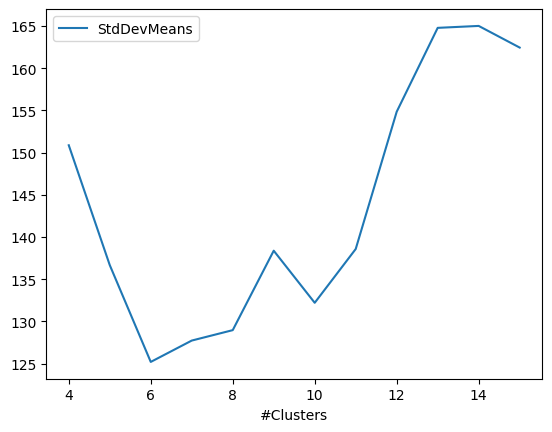

In [ ]:
# Your answer goes here



#The kmeans_list saves the models with the different number of clusters. The first entry is the model with 4 clusters, the last entry the model with 15 clusters.

means_list = []

#The means_list again has an entry for every considered number of clusters.
#Each entry contains a list with the mean for every cluster.
kmeans_list = []



for i in range (4,16):
    kmeans_list.append(KMeans(n_clusters=i, n_init=10, random_state=100).fit(cluster_data))


#We iterate through every number of clusters.
#We create a temporary file to save what cluster is assigned to each apartment with the current clustering.

for i in range (4,16):
    temp_data=train
    temp_data['Cluster'] = kmeans_list[i-4].labels_
    temp_means_list = []

#We calculate the mean price for every cluster of a specific clustering.
    for j in range (0,i):
        temp_data2 = temp_data[temp_data.Cluster == j]
        temp_means_list.append(temp_data2['price'].describe()['mean'])

    means_list.append(temp_means_list)



# Setting up the dataframe for the standard deviation plot
stdDevArray =[];

for meanSet in means_list:
    stdDevArray.append(np.std(meanSet))


numberOfClusters =[];

for x in range(4,16):
    numberOfClusters.append(x)

data= []

data.append(numberOfClusters)
data.append(stdDevArray)

df = pd.DataFrame(data).transpose()
df.columns=['#Clusters', 'StdDevMeans']


df.plot(x="#Clusters", y="StdDevMeans")
plt.show()






_Answer:_

We are choosing number of clusters with intra-cluster evaluation. Then, is better to choose number of clusters that has bigger standard deviation of means because the big number of standard deviation of means implies that clusters are chosen with more distinctly. Overall, standard deviation of means gets higher as number of clusters increases but too high number of clusters can cause overfitting. Therefore, from what is shown in this graph, it is ideal to choose 11 as a number of deviation since inclination from 10 to 11 is the highest.



**Note:** No matter the conclusion made in the previous task, from now on, you use the clustering model with **9 clusters** for predicting the price for your apartment and evaluating the clustering technique.

### Pricing your apartment (3 points)

To predict the price for your apartment, calculate in which cluster your apartment would be and use the mean value of the cluster as a possible price.

In [ ]:
# Your answer goes here
# cluster for 9 clusters


temp_data=train

# Saving the labels generated via k=9 to the temp_data set
temp_data['Cluster'] = kmeans_list[5].labels_



# Filtering for apartments with the same features as ours, extracting the label and calculating the recommended price
apartementClusterSet = temp_data.loc[(temp_data['number rooms'] == 2)& (temp_data['neighborhood group'] == "Manhattan") & (temp_data['room type'] == "Entire home/apt") ]


apartementCluster = apartementClusterSet['Cluster'].unique()[0]


meanClusterPrice = apartementClusterSet['price'].mean()

print("Our Cluster would be in cluster:"+ str(apartementCluster))
print("And the propsed price would be: %.2f" % meanClusterPrice)





Our Cluster would be in cluster:6
And the propsed price would be: 666.37


### Evaluating clustering (10 points)

You want to evaluate how well your clustering worked. In your case, two things can be evaluated:

1.   Whether the clustering technique can group similar apartments together
2.   Whether other people determine the price of their apartment as you did, meaning whether similar apartments get a similar price

You are going to evaluate the clustering technique visually. The IDS team provides you with the following fancy code that reduces your input to two dimensions.

In [ ]:


#Preprocessing numerical
full_data = train.drop(columns = ['id','price']) # use the train dataset here
numerical = full_data.select_dtypes(exclude='object')

for c in numerical.columns:
    pt = sklearn.preprocessing.PowerTransformer()
    numerical.loc[:, c] = pt.fit_transform(np.array(numerical[c]).reshape(-1, 1))

##preprocessing categorical
categorical = full_data.select_dtypes(include='object')
categorical = pd.get_dummies(categorical)

#Percentage of columns which are categorical is used as weight parameter in embeddings later
categorical_weight = len(full_data.select_dtypes(include='object').columns) / full_data.shape[1]

#Embedding numerical & categorical
fit1 = umap.UMAP(metric='l2').fit(numerical)
fit2 = umap.UMAP(metric='dice').fit(categorical)

#Augmenting the numerical embedding with categorical
intersection = umap.general_simplicial_set_intersection(fit1.graph_, fit2.graph_, weight=categorical_weight)
intersection = umap.reset_local_connectivity(intersection)
embedding = umap.simplicial_set_embedding(fit1._raw_data, intersection, fit1.n_components,
                                                fit1._initial_alpha, fit1._a, fit1._b,
                                                fit1.repulsion_strength, fit1.negative_sample_rate,
                                                200, 'random', np.random, fit1.metric,
                                                fit1._metric_kwds, False, {}, False)

# Extracting the resulting dimensions
dimension1 = embedding[0].T[0]
dimension2 = embedding[0].T[1]

/opt/conda/lib/python3.9/site-packages/umap/umap_.py:1802: UserWarning: gradient function is not yet implemented for dice distance metric; inverse_transform will be unavailable
  warn(


Create a scatter plot from the two dimensions and use the cluster labels for coloring the data points. Use the train set for the visualization. Discuss the result. **(5 points)**

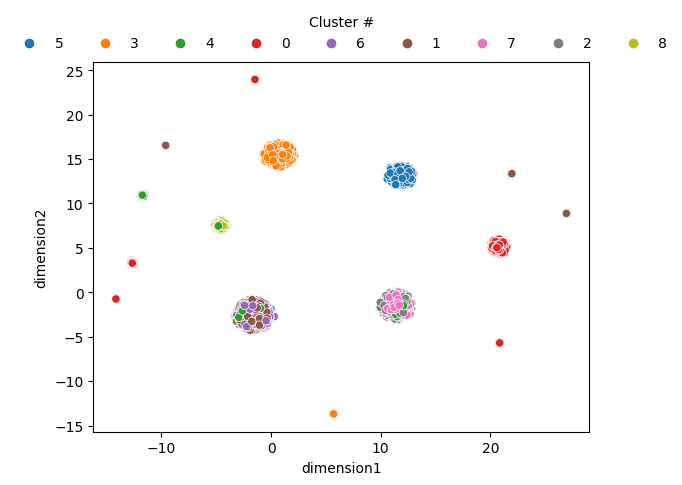

In [ ]:
# Your answer goes here

# Setting up the dataframe for the requested scatter plot usig dimension1/2 & the labels for k=9 from above

dataArray = {'dimension1': dimension1, 'dimension2': dimension2}

data_frame = pd.DataFrame(data=dataArray)

#print(data_frame)

secondary_temp_Data = temp_data.set_index(data_frame.index)

clusterCol = secondary_temp_Data["Cluster"]

data_frame = data_frame.join(clusterCol)

data_frame['Cluster'] = data_frame['Cluster'].astype(str)

# Plotting the scatterplot in the requested oconfiguration
clusterPlot = sns.scatterplot(data=data_frame, x="dimension1", y="dimension2", hue='Cluster')


# Making the plot pretty
sns.move_legend(
    clusterPlot, "lower center",
    bbox_to_anchor=(.5, 1), ncol=10, title="Cluster #", frameon=False,)

plt.show()





_Answer:_


At first sight going by the clusters and their mostly uniform coloring,  k=9 seemes to  do quite a good job clustering similar apartements together.
On the other hand we can not get to a definitive answer based only by the plot, since the majority of data points is covered by a minority of data points in the foreground´g
so that this visual representaion of the dimensions metric is not enough.








We next evaluate whether similar apartments (considering the attributes we chose) get similar prices. To do this, we use our test set. Assign each apartment of the test set to the nearest centroid. Predict the price of the apartments in the test set by taking the mean price of the cluster they was assigned to. Calculate the mean absolute error between the predicted and real prices. **(5 points)**

In [ ]:
# Your answer goes here

#We save the the assigned cluster for every apartment in the test_cluster_data_price datafile, according to the clustering with 9 clusters (corresponding to kmeans_list[5])
test_cluster_data_price['Cluster'] = kmeans_list[5].predict(test_cluster_data)

#Saves the predicted price for every apartment
predict_price = []

#The means_list contains the prices recommended according to the clusters. We assign this price to every apartment according to the cluster.
for i in range (len(test_cluster_data.index)):
    predict_price.append(means_list[5][test_cluster_data_price['Cluster'][i]])

#We save the predicted prices in the test_cluster_data_price data file.
test_cluster_data_price['predicted price'] = predict_price


price_diff = []
#We calculate the price difference with the predicted price and the actual price.

for i in range (len(test_cluster_data.index)):
    price_diff.append(abs(test_cluster_data_price['predicted price'][i] - test_cluster_data_price['price'][i]))


test_cluster_data_price['price diff']= price_diff

# We use the price difference to calculate the mean error.
print('The mean absolute error is ' + str(test_cluster_data_price['price diff'].describe()['mean']))

The mean absolute error is 259.104585697452


## Final comments on the price prediction (2 points)

Please compare the three approaches used for determining the price. Do they provide a good way of determining the price?

_Answer:_
Based on the average difference between the predicted prices and the real prices the clustering is the best method of the three. The error is about 260 on average.
The decision tree and baseline test both have an average error around 280, so they are both worse, but considering generating a decision tree is much more complex than a baseline test, it seems pointless using one in this scenarion.
However even the the error for clustering is really high with 260, considering most prices are in the range of a few hundred dollars. So overall none of the methods seem good in this scenario.




## Question 3: Investigating Price Elasticity (32 Points)

You show your results to Toby, excited about the price suggestions you got from the decision tree and clustering. You decide to take the higher price, which naturally means more income.

However, he points you to one central flaw in your thinking: The number of bookings is not independent of the price. Therefore, you can not just take any price and assume that this will lead to more income than a lower price, as the demand (utilization) for your apartment might decrease. This is called **price elasticity**.

You want to verify what Toby has been telling you. You extracted the utilization column of your dataset by grabbing the available data from AirBnB's calendar (smart!). The utilization values are contained in dataset **AirBnB_utilization.csv**. **Show several graphs investigating price elasticity.** For example, you might plot the utilization in relation to the price and color according to different variable values.
After you have verified Toby's statements, you want to learn price elasticity from the dataset (the utilization of an apartment given the price, the number of rooms, the room type, and the neighborhood group, i.e., the same features as before). With the learned price elasticity, you want to evaluate which of the proposed prices (decision tree or clustering) is the better choice. **(2 points)**

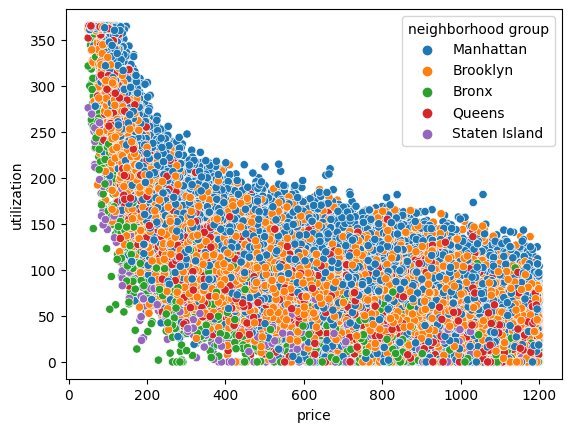

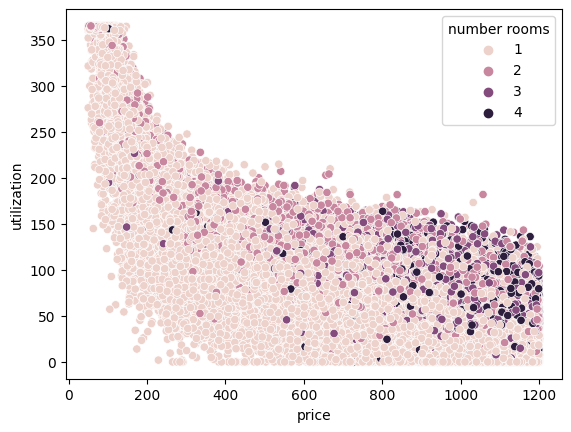

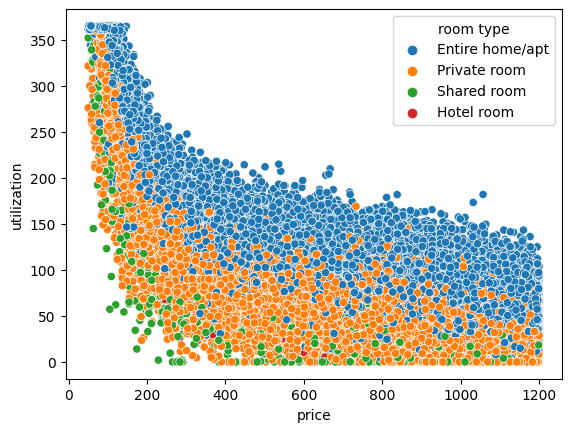

In [ ]:
# Your answer goes here

# We use seaborn scatterplots to plot the uttilization with respect to the price and varey the hue according to the features, if Toby is right we expect to see the same trend independent on the feature values

utilizationSet = pd.read_csv('AirBnB_utilization.csv')

utilizationSet = utilizationSet.drop("id", axis='columns')
tempDataSet = utilizationSet


sns.scatterplot(data=tempDataSet, x="price", y="utilization", hue ="neighborhood group")
plt.show()
plt.close()

sns.scatterplot(data=tempDataSet, x="price", y="utilization", hue ="number rooms")
plt.show()
plt.close()

sns.scatterplot(data=tempDataSet, x="price", y="utilization", hue ="room type")
plt.show()
plt.close()





You will investigate the relationship between price and utilization in this subtask. First, you will train different models and choose the one that best predicts utilization for an apartment. Second, you will evaluate which of the proposed prices of decision tree and clustering prices were better, assuming that your model provides the correct utilization. Third, you will conclude your investigation and provide a pricing decision.

### Learning price elasticity (25 points)
You want to use different supervised learning techniques to learn price elasticity. You decide on linear regression, SVM, and multilayer perceptrons. However, you have to preprocess the data. Use the features of the neighborhood group, the room type, the number of rooms, and the price to predict the utilization. Split into training and testing data (test size 5%).

#### Prepare the data set by splitting, one-hot encoding, and normalizing. (5 points)

In [ ]:
# Your answer goes here

utilSet = utilizationSet

# One hot encoding the utilizationSet
utilSetEnc = pd.get_dummies(utilSet, columns = ["room type","neighborhood group"])




# Normalizing the One-Hot encoded Utilization Set
scaler = MinMaxScaler()
scaler.fit(utilSetEnc)
scaled = scaler.fit_transform(utilSetEnc)


scaled_df = pd.DataFrame(scaled, columns= utilSetEnc.columns )

#We save the value the price, number of rooms and utilization was scaled by, so we can reverse it later. We also save the normalized value of the number of rooms for our apartment.
price_scale = scaler.scale_[1]
util_scale = scaler.scale_[2]
numberRooms_scale = scaler.scale_[0]
normalizedRoomNumber= 2*numberRooms_scale

# Splitting the data into training and test sets again making sure to use the same seed value as before
descriptive_features = scaled_df.drop(['utilization'], axis = 1)
target_feature = scaled_df['utilization']


X_train, X_test, y_train, y_test = train_test_split(descriptive_features,target_feature ,random_state=322420, test_size=0.05)


#print(normalizedRoomNumber)




For each technique, use 5-cross-fold validation for hyperparameter optimization and assess the performance on the test set.

#### Regression (5 points)

Learn a linear regression to predict the utilization of an AirBnB.

In [ ]:
# Your answer goes here
classifier = LinearRegression()
modelLinearRegression = classifier.fit(X_train,y_train)

print('Coefficients: \n', classifier.coef_)
print('Intercept: \n', classifier.intercept_)


Coefficients: 
 [ 1.85896038e-02 -5.88515026e-01  1.17699261e+12  1.17699261e+12
  1.17699261e+12  1.17699261e+12  6.97603095e+10  6.97603095e+10
  6.97603095e+10  6.97603095e+10  6.97603095e+10]
Intercept: 
 -1246752916459.955


What is the mean absolute error achieved on the test data?

In [ ]:
# Your answer goes here
#We use our model to predict the utilization of the test set and calculate the error regarding the actual utilization.
regression_prediction = classifier.predict(X_test)
mae_modelLinearRegression = mean_absolute_error(y_test, regression_prediction)/util_scale

print("The mean absolute error for the regression model is: : %.2f" % mae_modelLinearRegression)


The mean absolute error for the regression model is: : 35.34


Show (draw!) the price elasticity for your apartment.

<AxesSubplot:xlabel='price'>

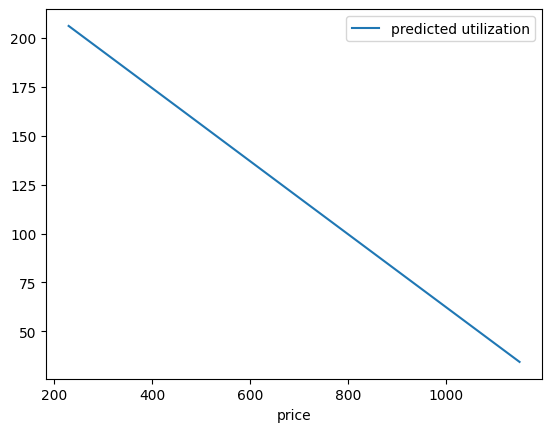

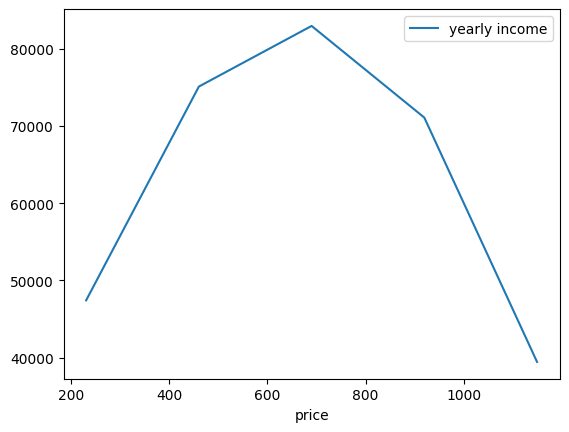

In [ ]:
# Your answer goes here

#We create a data set with the normalized values for our apartment by hand. We test with 5 different prices, which should capture the range of feasible prices.
ownApartment = {'number rooms': [normalizedRoomNumber,normalizedRoomNumber,normalizedRoomNumber,normalizedRoomNumber,normalizedRoomNumber], 'price': [0.2, 0.4,0.6,0.8,1],'room type_Entire home/apt': [1.0,1.0,1.0,1.0,1.0],'room type_Hotel room': [0.0,0.0,0.0,0.0,0.0],'room type_Private room': [0.0,0.0,0.0,0.0,0.0],'room type_Shared room': [0.0,0.0,0.0,0.0,0.0,],'neighborhood group_Bronx': [0.0,0.0,0.0,0.0,0.0],'neighborhood group_Brooklyn': [0.0,0.0,0.0,0.0,0.0],'neighborhood group_Manhattan': [1.0,1.0,1.0,1.0,1.0],'neighborhood group_Queens': [0.0,0.0,0.0,0.0,0.0],'neighborhood group_Staten Island': [0.0,0.0,0.0,0.0,0.0]}
ownApartmentDf = pd.DataFrame(data=ownApartment)

ownApartmentDf_util = ownApartmentDf.copy()
#We use the model to predict the utilization for our apartment with different prices
ownApartmentDf_util['predicted utilization'] = modelLinearRegression.predict(ownApartmentDf)

#We scale the prices back to the actual values.
ownApartmentDf_util['price'] = ownApartmentDf_util['price']/price_scale
#We use the utilization and prices to predict the yearly income.
ownApartmentDf_util['yearly income'] = ownApartmentDf_util['price']*ownApartmentDf_util['predicted utilization']*365
#We scale the utilization back to the actual values.
ownApartmentDf_util['predicted utilization'] = ownApartmentDf_util['predicted utilization']/util_scale

#We plot how the prices affect the predicted utilization and predicted yearly income.
ownApartmentDf_util.plot(x='price', y = 'predicted utilization')
ownApartmentDf_util.plot(x='price', y = 'yearly income')

#We use the same technique for the plots for the other models.




#### Linear SVR (5 points)

Train and evaluate a Linear SVR (Support Vector Regression) model.

In [ ]:
# Your answer goes here

param_grid = {"C":[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
             "loss":['epsilon_insensitive', 'squared_epsilon_insensitive']}

grid_LSVR = GridSearchCV(LinearSVR(), param_grid, cv = 5, verbose = 3)

grid_LSVR.fit(X_train, y_train)

print(grid_LSVR.best_params_)





Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ...C=0.1, loss=epsilon_insensitive;, score=0.609 total time=   0.2s
[CV 2/5] END ...C=0.1, loss=epsilon_insensitive;, score=0.612 total time=   0.2s
[CV 3/5] END ...C=0.1, loss=epsilon_insensitive;, score=0.611 total time=   0.3s
[CV 4/5] END ...C=0.1, loss=epsilon_insensitive;, score=0.610 total time=   0.2s
[CV 5/5] END ...C=0.1, loss=epsilon_insensitive;, score=0.612 total time=   0.2s
[CV 1/5] END C=0.1, loss=squared_epsilon_insensitive;, score=0.659 total time=   0.1s
[CV 2/5] END C=0.1, loss=squared_epsilon_insensitive;, score=0.654 total time=   0.1s
[CV 3/5] END C=0.1, loss=squared_epsilon_insensitive;, score=0.660 total time=   0.1s
[CV 4/5] END C=0.1, loss=squared_epsilon_insensitive;, score=0.659 total time=   0.1s
[CV 5/5] END C=0.1, loss=squared_epsilon_insensitive;, score=0.661 total time=   0.1s
[CV 1/5] END ...C=0.2, loss=epsilon_insensitive;, score=0.608 total time=   0.3s
[CV 2/5] END ...C=0.2,

/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END ...C=0.5, loss=epsilon_insensitive;, score=0.609 total time=   0.6s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END ...C=0.5, loss=epsilon_insensitive;, score=0.612 total time=   0.6s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END ...C=0.5, loss=epsilon_insensitive;, score=0.610 total time=   0.6s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END ...C=0.5, loss=epsilon_insensitive;, score=0.610 total time=   0.6s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END ...C=0.5, loss=epsilon_insensitive;, score=0.613 total time=   0.6s
[CV 1/5] END C=0.5, loss=squared_epsilon_insensitive;, score=0.659 total time=   0.2s
[CV 2/5] END C=0.5, loss=squared_epsilon_insensitive;, score=0.654 total time=   0.3s
[CV 3/5] END C=0.5, loss=squared_epsilon_insensitive;, score=0.660 total time=   0.3s
[CV 4/5] END C=0.5, loss=squared_epsilon_insensitive;, score=0.659 total time=   0.2s
[CV 5/5] END C=0.5, loss=squared_epsilon_insensitive;, score=0.660 total time=   0.3s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END ...C=0.6, loss=epsilon_insensitive;, score=0.610 total time=   0.7s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END ...C=0.6, loss=epsilon_insensitive;, score=0.611 total time=   0.9s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END ...C=0.6, loss=epsilon_insensitive;, score=0.612 total time=   0.7s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END ...C=0.6, loss=epsilon_insensitive;, score=0.610 total time=   0.7s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END ...C=0.6, loss=epsilon_insensitive;, score=0.612 total time=   1.4s
[CV 1/5] END C=0.6, loss=squared_epsilon_insensitive;, score=0.659 total time=   0.7s
[CV 2/5] END C=0.6, loss=squared_epsilon_insensitive;, score=0.654 total time=   0.4s
[CV 3/5] END C=0.6, loss=squared_epsilon_insensitive;, score=0.660 total time=   0.5s
[CV 4/5] END C=0.6, loss=squared_epsilon_insensitive;, score=0.659 total time=   1.0s
[CV 5/5] END C=0.6, loss=squared_epsilon_insensitive;, score=0.660 total time=   0.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END ...C=0.7, loss=epsilon_insensitive;, score=0.610 total time=   0.9s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END ...C=0.7, loss=epsilon_insensitive;, score=0.613 total time=   1.9s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END ...C=0.7, loss=epsilon_insensitive;, score=0.612 total time=   1.6s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END ...C=0.7, loss=epsilon_insensitive;, score=0.609 total time=   0.9s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END ...C=0.7, loss=epsilon_insensitive;, score=0.614 total time=   1.2s
[CV 1/5] END C=0.7, loss=squared_epsilon_insensitive;, score=0.659 total time=   0.4s
[CV 2/5] END C=0.7, loss=squared_epsilon_insensitive;, score=0.654 total time=   0.4s
[CV 3/5] END C=0.7, loss=squared_epsilon_insensitive;, score=0.660 total time=   0.4s
[CV 4/5] END C=0.7, loss=squared_epsilon_insensitive;, score=0.659 total time=   0.4s
[CV 5/5] END C=0.7, loss=squared_epsilon_insensitive;, score=0.660 total time=   0.3s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END ...C=0.8, loss=epsilon_insensitive;, score=0.610 total time=   1.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END ...C=0.8, loss=epsilon_insensitive;, score=0.612 total time=   1.0s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END ...C=0.8, loss=epsilon_insensitive;, score=0.613 total time=   1.3s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END ...C=0.8, loss=epsilon_insensitive;, score=0.611 total time=   1.0s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END ...C=0.8, loss=epsilon_insensitive;, score=0.614 total time=   1.0s
[CV 1/5] END C=0.8, loss=squared_epsilon_insensitive;, score=0.659 total time=   0.7s
[CV 2/5] END C=0.8, loss=squared_epsilon_insensitive;, score=0.654 total time=   0.5s
[CV 3/5] END C=0.8, loss=squared_epsilon_insensitive;, score=0.660 total time=   0.5s
[CV 4/5] END C=0.8, loss=squared_epsilon_insensitive;, score=0.659 total time=   0.4s
[CV 5/5] END C=0.8, loss=squared_epsilon_insensitive;, score=0.660 total time=   0.9s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END ...C=0.9, loss=epsilon_insensitive;, score=0.609 total time=   1.3s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END ...C=0.9, loss=epsilon_insensitive;, score=0.610 total time=   1.1s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END ...C=0.9, loss=epsilon_insensitive;, score=0.611 total time=   1.3s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END ...C=0.9, loss=epsilon_insensitive;, score=0.611 total time=   1.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END ...C=0.9, loss=epsilon_insensitive;, score=0.611 total time=   1.0s
[CV 1/5] END C=0.9, loss=squared_epsilon_insensitive;, score=0.659 total time=   0.5s
[CV 2/5] END C=0.9, loss=squared_epsilon_insensitive;, score=0.654 total time=   0.9s
[CV 3/5] END C=0.9, loss=squared_epsilon_insensitive;, score=0.660 total time=   0.5s
[CV 4/5] END C=0.9, loss=squared_epsilon_insensitive;, score=0.659 total time=   0.5s
[CV 5/5] END C=0.9, loss=squared_epsilon_insensitive;, score=0.660 total time=   0.4s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END .....C=1, loss=epsilon_insensitive;, score=0.610 total time=   1.7s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END .....C=1, loss=epsilon_insensitive;, score=0.613 total time=   1.1s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END .....C=1, loss=epsilon_insensitive;, score=0.611 total time=   1.4s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END .....C=1, loss=epsilon_insensitive;, score=0.608 total time=   1.6s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END .....C=1, loss=epsilon_insensitive;, score=0.613 total time=   1.1s
[CV 1/5] END C=1, loss=squared_epsilon_insensitive;, score=0.659 total time=   0.9s
[CV 2/5] END C=1, loss=squared_epsilon_insensitive;, score=0.654 total time=   0.5s
[CV 3/5] END C=1, loss=squared_epsilon_insensitive;, score=0.660 total time=   0.8s
[CV 4/5] END C=1, loss=squared_epsilon_insensitive;, score=0.659 total time=   0.9s
[CV 5/5] END C=1, loss=squared_epsilon_insensitive;, score=0.660 total time=   0.5s
{'C': 0.1, 'loss': 'squared_epsilon_insensitive'}


What is the mean absolute error achieved on the test data?

In [ ]:
# Your answer goes here

#We use our model to predict the utilization of the test set and calculate the error regarding the actual utilization.
linearSVR_Prediction = grid_LSVR.predict(X_test)
mae_modelLinearSVR = mean_absolute_error(y_test, linearSVR_Prediction)/util_scale
print("The mean absolute error for linear SVR is: %.2f" % mae_modelLinearSVR)


The mean absolute error for linear SVR is: 35.30


Show (draw!) the price elasticity for your apartment.

<AxesSubplot:xlabel='price'>

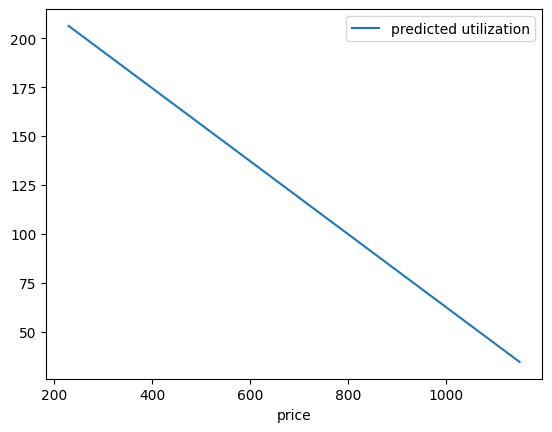

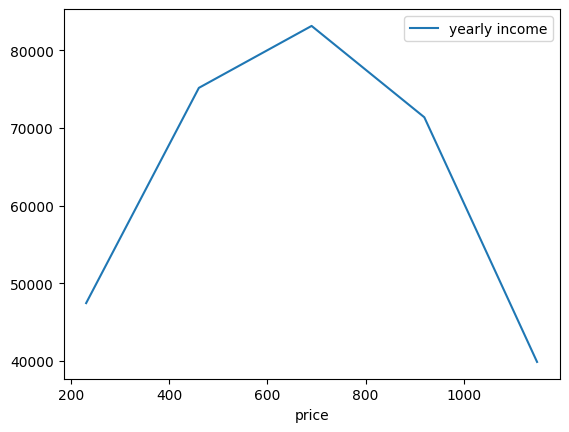

In [ ]:
# Your answer goes here

ownApartment = {'number rooms': [normalizedRoomNumber,normalizedRoomNumber,normalizedRoomNumber,normalizedRoomNumber,normalizedRoomNumber], 'price': [0.2, 0.4,0.6,0.8,1],'room type_Entire home/apt': [1.0,1.0,1.0,1.0,1.0],'room type_Hotel room': [0.0,0.0,0.0,0.0,0.0],'room type_Private room': [0.0,0.0,0.0,0.0,0.0],'room type_Shared room': [0.0,0.0,0.0,0.0,0.0,],'neighborhood group_Bronx': [0.0,0.0,0.0,0.0,0.0],'neighborhood group_Brooklyn': [0.0,0.0,0.0,0.0,0.0],'neighborhood group_Manhattan': [1.0,1.0,1.0,1.0,1.0],'neighborhood group_Queens': [0.0,0.0,0.0,0.0,0.0],'neighborhood group_Staten Island': [0.0,0.0,0.0,0.0,0.0]}
ownApartmentDf = pd.DataFrame(data=ownApartment)


ownApartmentDf_util = ownApartmentDf.copy()
ownApartmentDf_util['predicted utilization'] = grid_LSVR.predict(ownApartmentDf)

ownApartmentDf_util['price'] = ownApartmentDf_util['price']/price_scale
ownApartmentDf_util['yearly income'] = ownApartmentDf_util['price']*ownApartmentDf_util['predicted utilization']*365
ownApartmentDf_util['predicted utilization'] = ownApartmentDf_util['predicted utilization']/util_scale
ownApartmentDf_util.plot(x='price', y = 'predicted utilization')
ownApartmentDf_util.plot(x='price', y = 'yearly income')



#### Learning Non-Linear Relationships

You realize that learning linear relationships only provides limited performance. You want to learn non-linear relationships. First, you will learn non-linear relationships using linear regression and kernels. Second, you will use non-linear kernels in the Support Vector Regression. Third, you will use neural networks.

#### Kernels in Regression (2.5 points)

Use a transformation of the price and a regression to incorporate non-linear relationships, as learned in the lecture. You can try different kernel functions, but at least you should use one quadratic kernel.

In [ ]:
#We transorm the data with a quadratic kernel function.

train_copy = X_train.copy()
test_copy = X_test.copy()
poly = PolynomialFeatures(2)
poly_train = poly.fit_transform(train_copy)
poly_test = poly.fit_transform(test_copy)

#We use the same Regression function as in the first regression task, but with the transformed data.
regression_kernel = LinearRegression()
modelRegression = regression_kernel.fit(poly_train,y_train)





What is the mean absolute error achieved on the test data?

In [ ]:
#We use our model to predict the utilization of the test set and calculate the error regarding the actual utilization.
regression_kernel_Prediction = regression_kernel.predict(poly_test)
mae_modelRegression_kernel = mean_absolute_error(y_test, regression_kernel_Prediction)/util_scale
print("The mean absolute error for regression with kernels is: %.2f" % mae_modelRegression_kernel)

The mean absolute error for regression with kernels is: 27.99


Show (draw!) the price elasticity for your apartment.

<AxesSubplot:xlabel='price'>

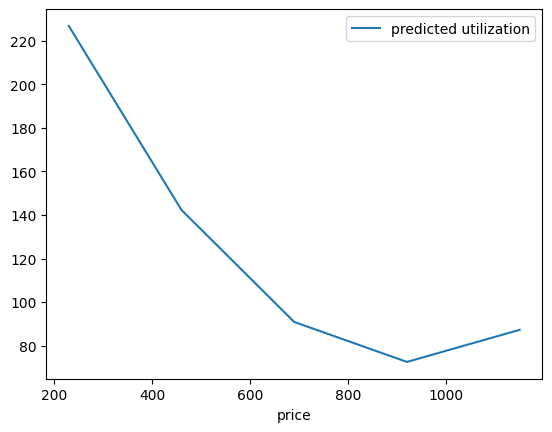

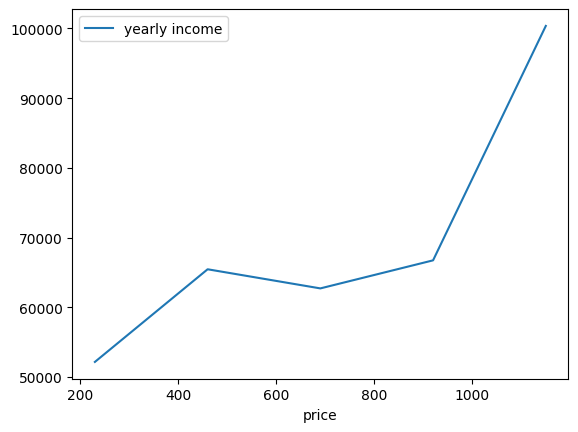

In [ ]:
ownApartment = {'number rooms': [normalizedRoomNumber,normalizedRoomNumber,normalizedRoomNumber,normalizedRoomNumber,normalizedRoomNumber], 'price': [0.2, 0.4,0.6,0.8,1],'room type_Entire home/apt': [1.0,1.0,1.0,1.0,1.0],'room type_Hotel room': [0.0,0.0,0.0,0.0,0.0],'room type_Private room': [0.0,0.0,0.0,0.0,0.0],'room type_Shared room': [0.0,0.0,0.0,0.0,0.0,],'neighborhood group_Bronx': [0.0,0.0,0.0,0.0,0.0],'neighborhood group_Brooklyn': [0.0,0.0,0.0,0.0,0.0],'neighborhood group_Manhattan': [1.0,1.0,1.0,1.0,1.0],'neighborhood group_Queens': [0.0,0.0,0.0,0.0,0.0],'neighborhood group_Staten Island': [0.0,0.0,0.0,0.0,0.0]}
ownApartmentDf = pd.DataFrame(data=ownApartment)


ownApartmentDf_poly = ownApartmentDf.copy()
ownApartmentDf_poly = poly.fit_transform(ownApartmentDf_poly)

predicted_utilization = regression_kernel.predict(ownApartmentDf_poly)

ownApartmentDf['price'] = ownApartmentDf['price']/price_scale
ownApartmentDf_util['yearly income'] = ownApartmentDf_util['price']*predicted_utilization*365
ownApartmentDf['predicted utilization'] = predicted_utilization/util_scale
ownApartmentDf.plot(x='price', y = 'predicted utilization')
ownApartmentDf_util.plot(x='price', y = 'yearly income')

#### Kernels in SVR (2.5 points)

Train and evaluate an SVR (Support Vector Regression) model with different, non-linear kernels. You can limit the size of your training set to 25000 samples to make the problem feasible in computation time.

In [ ]:
# Your answer goes here

#We train a SVR model. We use the grid search function to determine the best kernel function.
#We limit the the the amount of data we process due to time constraints.
param_grid = {'kernel': ['poly','rbf','sigmoid']}
SVR_kernel_grid = GridSearchCV(SVR(), param_grid, cv = 5, verbose = 3)
SVR_kernel_grid.fit(X_train[:1000], y_train[:1000])
print(SVR_kernel_grid.best_params_)


Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END .......................kernel=poly;, score=0.802 total time=   0.0s
[CV 2/5] END .......................kernel=poly;, score=0.814 total time=   0.0s
[CV 3/5] END .......................kernel=poly;, score=0.805 total time=   0.0s
[CV 4/5] END .......................kernel=poly;, score=0.710 total time=   0.0s
[CV 5/5] END .......................kernel=poly;, score=0.776 total time=   0.0s
[CV 1/5] END ........................kernel=rbf;, score=0.802 total time=   0.0s
[CV 2/5] END ........................kernel=rbf;, score=0.816 total time=   0.0s
[CV 3/5] END ........................kernel=rbf;, score=0.805 total time=   0.0s
[CV 4/5] END ........................kernel=rbf;, score=0.726 total time=   0.0s
[CV 5/5] END ........................kernel=rbf;, score=0.785 total time=   0.0s
[CV 1/5] END ...............kernel=sigmoid;, score=-17478.078 total time=   0.1s
[CV 2/5] END ...............kernel=sigmoid;, scor

What is the mean absolute error achieved on the test data?

In [ ]:
# Your answer goes here
#We use our model to predict the utilization of the test set and calculate the error regarding the actual utilization.
SVR_kernel_Prediction = SVR_kernel_grid.predict(X_test)
mae_modelSVR_kernel = mean_absolute_error(y_test, SVR_kernel_Prediction)/util_scale
print("The mean absolute error for SVR with kernels is: %.2f" % mae_modelSVR_kernel)

The mean absolute error for SVR with kernels is: 27.99


Show (draw!) the price elasticity for your apartment.

<AxesSubplot:xlabel='price'>

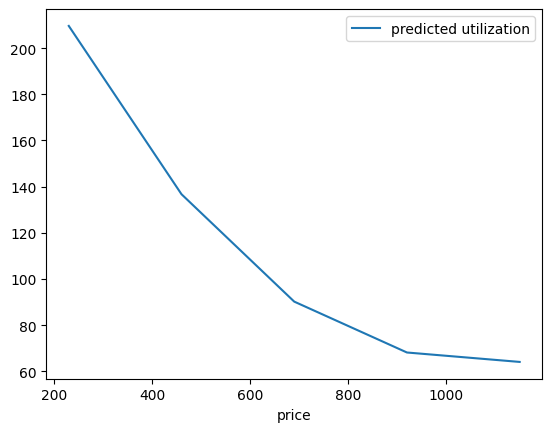

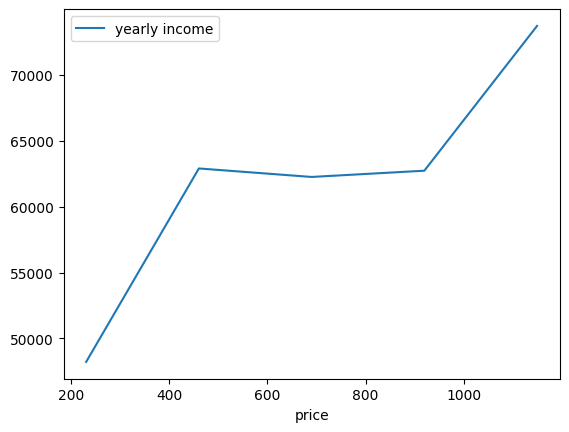

In [ ]:
# Your answer goes here
ownApartment = {'number rooms': [normalizedRoomNumber,normalizedRoomNumber,normalizedRoomNumber,normalizedRoomNumber,normalizedRoomNumber], 'price': [0.2, 0.4,0.6,0.8,1],'room type_Entire home/apt': [1.0,1.0,1.0,1.0,1.0],'room type_Hotel room': [0.0,0.0,0.0,0.0,0.0],'room type_Private room': [0.0,0.0,0.0,0.0,0.0],'room type_Shared room': [0.0,0.0,0.0,0.0,0.0,],'neighborhood group_Bronx': [0.0,0.0,0.0,0.0,0.0],'neighborhood group_Brooklyn': [0.0,0.0,0.0,0.0,0.0],'neighborhood group_Manhattan': [1.0,1.0,1.0,1.0,1.0],'neighborhood group_Queens': [0.0,0.0,0.0,0.0,0.0],'neighborhood group_Staten Island': [0.0,0.0,0.0,0.0,0.0]}
ownApartmentDf = pd.DataFrame(data=ownApartment)


ownApartmentDf_util = ownApartmentDf.copy()
ownApartmentDf_util['predicted utilization'] = SVR_kernel_grid.predict(ownApartmentDf)

ownApartmentDf_util['price'] = ownApartmentDf_util['price']/price_scale
ownApartmentDf_util['yearly income'] = ownApartmentDf_util['price']*ownApartmentDf_util['predicted utilization']*365
ownApartmentDf_util['predicted utilization'] = ownApartmentDf_util['predicted utilization']/util_scale
ownApartmentDf_util.plot(x='price', y = 'predicted utilization')
ownApartmentDf_util.plot(x='price', y = 'yearly income')

What is your conclusion on using kernels?

_Answer:_

Comparing the mean absolute errors of different models,  we see that the models derived via kernels have a better performance with respect to the mean error.
While at the same time different kernel variations seem to have a quite similar mean absolute error, with the exception of the Sigmoid kernel which has the worst performance.





#### Neural Network (5 points)

Learn a neural network (multilayer perceptron) to predict the utilization of an AirBnB.

In [ ]:
# Your answer goes here

#We train a Multi-layer Perceptron regressor. We use the grid search function to determine the best activation function and the best number of hidden layers.
#We limit the the the amount of data we process due to time constraints.
param_grid = {'activation': ['identity', 'logistic', 'tanh', 'relu'], 'hidden_layer_sizes' : [50,100,150,200]}

grid_NN = GridSearchCV(MLPRegressor(), param_grid, cv = 5, verbose = 3)

grid_NN.fit(X_train[:1000], y_train[:1000])
print(grid_NN.best_params_)
targetFeature_predict = grid_NN.predict(X_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END activation=identity, hidden_layer_sizes=50;, score=0.700 total time=   0.5s
[CV 2/5] END activation=identity, hidden_layer_sizes=50;, score=0.661 total time=   0.2s
[CV 3/5] END activation=identity, hidden_layer_sizes=50;, score=0.664 total time=   0.1s
[CV 4/5] END activation=identity, hidden_layer_sizes=50;, score=0.621 total time=   0.4s
[CV 5/5] END activation=identity, hidden_layer_sizes=50;, score=0.679 total time=   0.4s
[CV 1/5] END activation=identity, hidden_layer_sizes=100;, score=0.701 total time=   0.2s
[CV 2/5] END activation=identity, hidden_layer_sizes=100;, score=0.663 total time=   0.4s
[CV 3/5] END activation=identity, hidden_layer_sizes=100;, score=0.664 total time=   0.4s
[CV 4/5] END activation=identity, hidden_layer_sizes=100;, score=0.629 total time=   0.2s
[CV 5/5] END activation=identity, hidden_layer_sizes=100;, score=0.650 total time=   0.6s
[CV 1/5] END activation=identity, hidden_lay

What is the mean absolute error achieved on the test data?

In [ ]:
# Your answer goes here
#We use our model to predict the utilization of the test set and calculate the error regarding the actual utilization.
NN_Prediction = grid_NN.predict(X_test)
mae_modelLinearNN = mean_absolute_error(y_test, NN_Prediction)/util_scale
print("The mean absolute error for the neural network is: %.2f" % mae_modelLinearNN)

The mean absolute error for the neural network is: 31.79


Show (draw!) the price elasticity for your apartment.

<AxesSubplot:xlabel='price'>

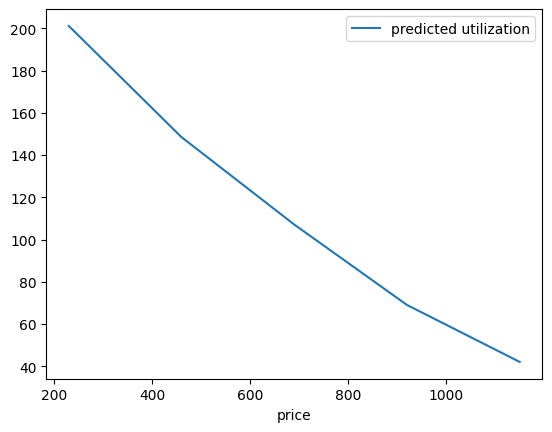

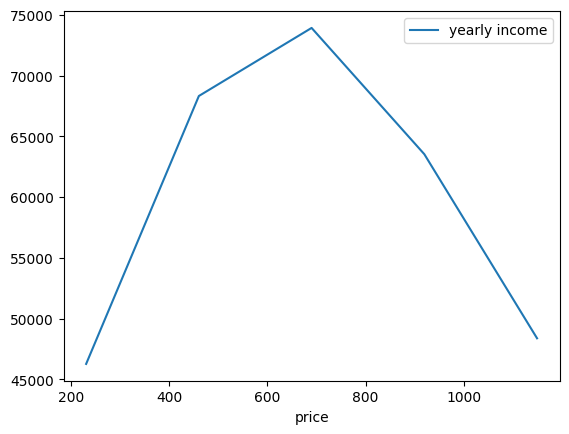

In [ ]:
# Your answer goes here
ownApartment = {'number rooms': [normalizedRoomNumber,normalizedRoomNumber,normalizedRoomNumber,normalizedRoomNumber,normalizedRoomNumber], 'price': [0.2, 0.4,0.6,0.8,1],'room type_Entire home/apt': [1.0,1.0,1.0,1.0,1.0],'room type_Hotel room': [0.0,0.0,0.0,0.0,0.0],'room type_Private room': [0.0,0.0,0.0,0.0,0.0],'room type_Shared room': [0.0,0.0,0.0,0.0,0.0,],'neighborhood group_Bronx': [0.0,0.0,0.0,0.0,0.0],'neighborhood group_Brooklyn': [0.0,0.0,0.0,0.0,0.0],'neighborhood group_Manhattan': [1.0,1.0,1.0,1.0,1.0],'neighborhood group_Queens': [0.0,0.0,0.0,0.0,0.0],'neighborhood group_Staten Island': [0.0,0.0,0.0,0.0,0.0]}
ownApartmentDf = pd.DataFrame(data=ownApartment)


ownApartmentDf_util = ownApartmentDf.copy()
ownApartmentDf_util['predicted utilization'] = grid_NN.predict(ownApartmentDf)

ownApartmentDf_util['price'] = ownApartmentDf_util['price']/price_scale
ownApartmentDf_util['yearly income'] = ownApartmentDf_util['price']*ownApartmentDf_util['predicted utilization']*365
ownApartmentDf_util['predicted utilization'] = ownApartmentDf_util['predicted utilization']/util_scale
ownApartmentDf_util.plot(x='price', y = 'predicted utilization')
ownApartmentDf_util.plot(x='price', y = 'yearly income')

### Profit discrepencies when incorporating price elasticity (5 points)

Use the model that best captures price elasticity on the testing set. You can assume that this model accurately captures price elasticity, i.e., is the ground truth. What is the better of the two proposed prices? Is the better price the optimal price?

In [ ]:
#We create a data frame for our apartment with the prices from the decision tree and clustering
comp = {'number rooms': [normalizedRoomNumber,normalizedRoomNumber], 'price': [proposedPriceDT*price_scale, meanClusterPrice*price_scale],'room type_Entire home/apt': [1.0,1.0],'room type_Hotel room': [0.0,0.0],'room type_Private room': [0.0,0.0],'room type_Shared room': [0.0,0.0],'neighborhood group_Bronx': [0.0,0.0],'neighborhood group_Brooklyn': [0.0,0.0],'neighborhood group_Manhattan': [1.0,1.0],'neighborhood group_Queens': [0.0,0.0],'neighborhood group_Staten Island': [0.0,0.0]}
elasticity_comp = pd.DataFrame(data=comp)
#We use the neural network to predict the utilization of our apartment with those prices.
elasticity_comp = grid_NN.predict(elasticity_comp)
#We scale the utilization back to normal.
temp1 = elasticity_comp[0]/util_scale
temp2 = elasticity_comp[1]/util_scale

#We output the daily profit we can expect with those prices according to the neural network model.

print('The best price according to the decision tree is: %.2f' % proposedPriceDT)
print('The best price according to the clustering is: %.2f' % meanClusterPrice)
print('The best model for price elasticity is the neural network')
print('According to the model the utilization with the price from the decision tree is %.2f' % temp1 +' and with the price from the clustering the utilization is %.2f' % temp2 )
print('That means that we can expect a daily profit of %.2f' % (temp1/365 * proposedPriceDT)  + ' dollars with the decision tree price and a daily profit of %.2f' % (temp2/365 * meanClusterPrice)+'  dollars with the cluster price')
if (temp1/365 * proposedPriceDT)>(temp2/365 * meanClusterPrice):
    print('So the decision tree price is better, but most likely not optimal.')
else:
    print('So the cluster price is better, but most likely not optimal.')
print('There are two reasons why this is the case: Firstly, neither the decision tree nor the clustering generate perfect models in the vast majority of cases.')
print('Secondly we trained those models just according to the pricing of other apartments, disregarding utilization.')
print('We could only get a perfect model this way, if all other apartmens were perfectly prized for maximum profit, which is extremly unlikely.')
print('We could however use our best model from Q3 to define a function that maps the prize to the expected profit and try to calculated the maximum of that function.')
print('But it would be very difficult to calculate the exact maximum of that function without approximating.')

The best price according to the decision tree is: 700.00
The best price according to the clustering is: 666.37
The best model for price elasticity is the neural network
According to the model the utilization with the price from the decision tree is 105.43 and with the price from the clustering the utilization is 111.13
That means that we can expect a daily profit of 202.19 with the decision tree price and a daily profit of 202.89 with the cluster price
So the cluster price is better, but most likely not optimal.
There are two reasons why this is the case: Firstly, neither the decision tree nor the clustering generate perfect models in the vast majority of cases.
Secondly we trained those models just according to the pricing of other apartments, disregarding utilization.
We could only get a perfect model this way, if all other apartmens were perfectly prized for maximum profit, which is extremly unlikely.
We could however use our best model from Q3 to define a function that maps the pri

_Answer:_

See above :D



# Question 4: Conclusion (5 points)

Summarize your findings and discuss limitations.

_Answer:_

In Question 1 we found out that most of the original data set is not useful. It first had to be cleaned from missing entries and duplicates.
And even after that most features are not really helpful in predicting a good prize, because some are directly dependent the prize, like the service fee, and some are not correlated at all, like the minimum number of nights.
We determined that the room type, the number of rooms and the neighborhood group will be the most helpful.

In Question 2 we trained a decision tree and a k-means clustering with these most helpful features to find the optimal price for our apartment. The decision tree suggested a price of 700, the clustering a price of about 670.
However, both models are far from optimal, as was clear by the rather large mean error of both when tested.
The exact interval of the bins for the decision tree had an influence on its suggested price and the number of clusters a large influence on its suggested price, so it's best to spent some time to find good values for those.
It also proved to be difficult to compare the results from both methods, because both needed a different kind of transformation (binning for the decision tree and one hot encoding for the clustering) to train their model, so a diligent handling of the data frames is important.

In Question 3 we investigated how different prizes have an effect on the utilization of the apartments so we can find the price for our apartment with the biggest profit.
In order to do so we trained different kinds of models to predict the utilization depending on the prize so we could use the best of those models to compare the profits we can expect with the suggested price from the decision tree and the clustering.
We found out that a higher prize directly leads to lower utilization, which is not really surprising.
But we could also see that there is a sweetspot for every apartment so that the prize is high enough, but not so high that it leads to a very low utilization and thus generates a good profit.
It is not possible however to easily extract an optimal prize from our models though, as this would lead to another non-trivial optimization problem.

